# Newsguard description

In [27]:
from os.path import join
import os
import pandas as pd
import random
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import factor_analyzer
import statsmodels.api as sm
#plt.style.use("apa.mplstyle") #custom matplotlib style

In [28]:
folder_path = "/data/NewsGuard/full-metadata/"
figures_path = "/home/jluehring/newsguard/newsguard-review-paper/figures/"
tables_path = "/home/jluehring/newsguard/newsguard-review-paper/tables/"

## Reading CSV files

In [29]:
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

In [30]:
df_total = pd.DataFrame()
for csv in csv_files: #taking all files in the folder
    df = pd.read_csv(join(folder_path, csv))
    df.name=csv
    #print(df.shape)
    # taking name of file, removing the extension and "metadata-"
    df["file_date"]=csv.split(".")[0].split("-")[1]
    # making file_date a datetime, with the format YYYYMMDD00
    df["file_date"]=pd.to_datetime(df["file_date"], format="%Y%m%d%H")
    df_total = pd.concat([df_total, df], axis=0)

In [31]:
csv_files = [f for f in os.listdir(folder_path) if f.endswith('1501.csv')] #taking only mid-month 
df15 = pd.DataFrame()
for csv in csv_files:
    df = pd.read_csv(join(folder_path, csv))
    df.name=csv
    #print(df.shape)
    df["file_date"]=csv.split(".")[0].split("-")[1]
    df["file_date"]=pd.to_datetime(df["file_date"], format="%Y%m%d%H")
    df15 = pd.concat([df15, df], axis=0)

In [32]:
csv_files = [f for f in os.listdir(folder_path) if f.endswith('0201.csv')] #taking only beginning of month
df02 = pd.DataFrame()
for csv in csv_files:
    df = pd.read_csv(join(folder_path, csv))
    df.name=csv
    #print(df.shape)
    df["file_date"]=csv.split(".")[0].split("-")[1]
    df["file_date"]=pd.to_datetime(df["file_date"], format="%Y%m%d%H")
    df02 = pd.concat([df02, df], axis=0)

## Domains

In [33]:
#converting date to only the month
df15["file_month"] = pd.to_datetime(df15.file_date).dt.to_period("M")
counts = df15.groupby(df15.file_month).Domain.nunique()
counts.head(3)

file_month
2019-03    2641
2019-04     347
2019-05     335
Freq: M, Name: Domain, dtype: int64

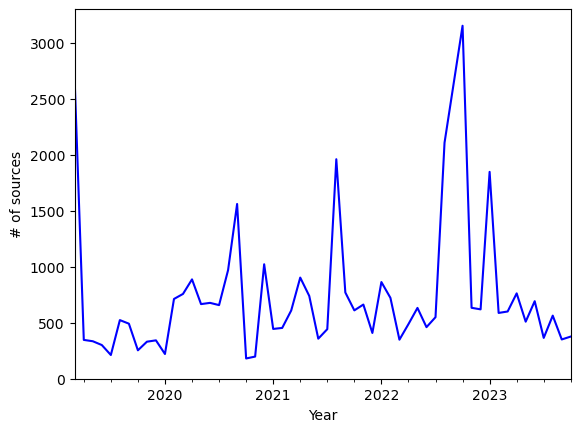

In [34]:
counts.plot(color="blue")
plt.ylim(0)
plt.xlabel("Year")
plt.ylabel("# of sources")
plt.savefig(join(figures_path, "sources_over_time_midmonth.png"), dpi=300)
plt.show()

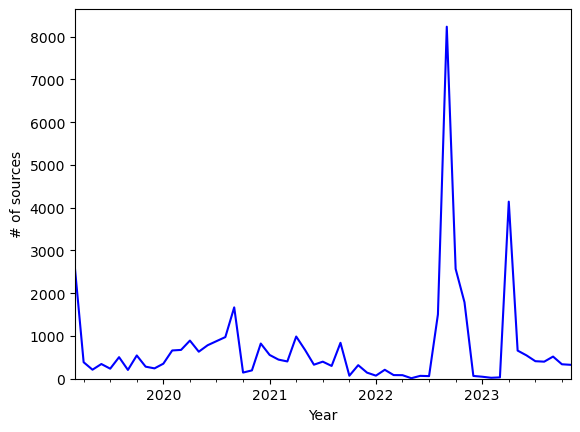

In [35]:
#converting date format to only the month
df02["file_month"] = pd.to_datetime(df02.file_date).dt.to_period("M")
counts = df02.groupby(df02.file_month).Domain.nunique()
counts.plot(color="blue")
plt.ylim(0)
plt.xlabel("Year")
plt.ylabel("# of sources")
plt.savefig(join(figures_path, "sources_over_time_firstmonth.png"), dpi=300)
#plt.show()

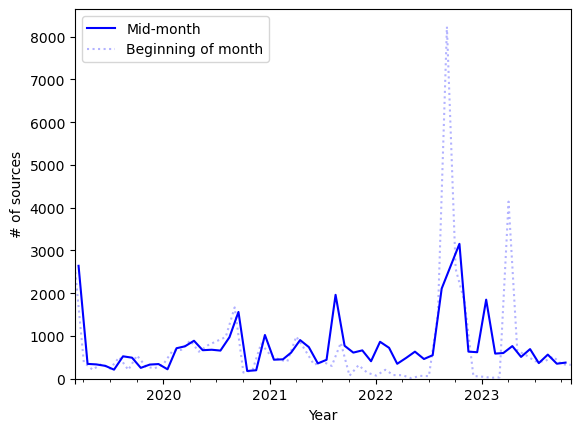

In [36]:
#converting date format to only the month
df15["file_day"] = pd.to_datetime(df15.file_date).dt.to_period("D")
df02["file_day"] = pd.to_datetime(df02.file_date).dt.to_period("D")

#counting unique domains for each condition
counts_15 = df15.groupby(df15.file_day).Domain.nunique()
counts_02 = df02.groupby(df02.file_day).Domain.nunique()

#plotting
counts_15.plot(color="blue", label="Mid-month")
counts_02.plot(color="blue", label="Beginning of month", alpha=0.3, linestyle="dotted")
plt.ylim(0)
plt.xlabel("Year")
plt.ylabel("# of sources")
#plt.xticks(rotation=20)
plt.legend()
plt.savefig(join(figures_path,"f1-sources_over_time.png"), dpi=300)
plt.show()

In [37]:
date = pd.to_datetime("2023-10").to_period("M")
most_recent = df15[df15["file_month"] == date]
len(most_recent)

446

In [38]:
date = pd.to_datetime("2019-03").to_period("M")
first = df15[df15["file_month"] == date]
len(first)

2647

In [39]:
most_recent.Rating.value_counts(normalize=True)

T     0.585202
N     0.217489
FL    0.186099
P     0.006726
S     0.004484
Name: Rating, dtype: float64

In [40]:
most_recent.Rating.value_counts(normalize=False)

T     261
N      97
FL     83
P       3
S       2
Name: Rating, dtype: int64

In [41]:
most_recent[most_recent.Rating == "P"].Domain.unique()

array(['odysee.com', 'bitchute.com'], dtype=object)

In [42]:
most_recent[most_recent.Rating == "FL"].Domain.unique()

array(['govietnamtravel.asia', 'odishadiscoms.com',
       'celebritiesmoney.com', 'howtoplantus.blogspot.com',
       'fashionableform.com', 'editorializenews.com', 'law-magazine.com',
       'networthculture.com', 'escuelahairstudio.com.ar',
       'top10companiesinus.blogspot.com/', 'businesshab.com', 'biiuk.com',
       'hookeaudio.com', 'sunaulorojgar.com', 'decimaltoinches.com',
       'genealogie-wassenaar.nl', 'bharatstories.com', 'roshni.com.pk',
       'cantechletter.com', 'binzaheercracks.com', 'moneyhaat.com',
       'newsceleb.astandloran.com', 'feedbegin.com',
       'newstodaycalifornia.com', 'dotcommagazine.com',
       'fantasykhiladi.com', 'webnews21.com', 'onnedge.com',
       'todayonit.com', 'bollyinside.com', 'pxcrt.com',
       'tarotcardsreaders.com', 'cankutahya.com.tr', 'luggagewiki.com',
       'locobelly.com', 'prsync.com', 'techfull.org',
       'arquitecturanoticias.com', 'recipe.hondausrelease.com',
       'fleeredstates.blog', 'coforbes.com', 'bolsadetra

In [43]:
#print mean of score per rating category
most_recent.groupby("Rating").Score.mean()

Rating
FL          NaN
N     31.613402
P           NaN
S           NaN
T     87.647510
Name: Score, dtype: float64

In [44]:
p_rating = most_recent[most_recent["Rating"] == "P"]
if not p_rating["Score"].isnull().all():
    mean_score = p_rating["Score"].mean(skipna=True)
    print(f"Mean score for rating P: {mean_score}")
else:
    print(f"No scores available for rating P.")

No scores available for rating P.


The categories S, P, and FL refer to Platforms, as well as Satire and Lifestyle outlets, respectively. They also don't have a trustworthiness score. How many domains are rated in the first and the most recent dataframe?

In [45]:
print(f'In the most recent df, there are {len(most_recent[most_recent["Score"].notnull()])} rated domains while there are {len(first[first["Score"].notnull()])} in the first version of the database.')

#subset the data to only include the domains that have a score
#rated_domains = most_recent[most_recent["Score"].notnull()]

In the most recent df, there are 358 rated domains while there are 2615 in the first version of the database.


## Trustworthiness

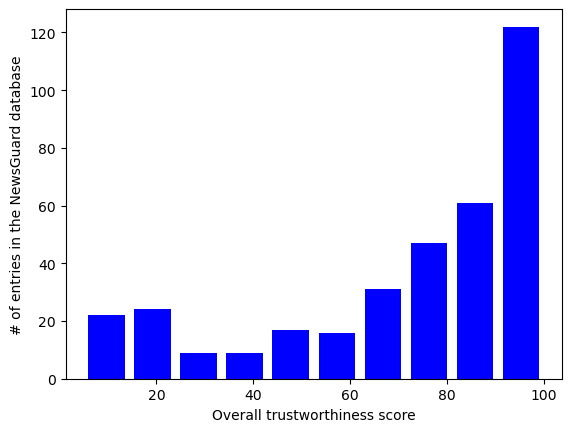

In [46]:
most_recent["Score"].hist(bins=10, color="blue", rwidth=0.8, grid=False)
plt.xlabel("Overall trustworthiness score")
plt.ylabel("# of entries in the NewsGuard database")
plt.savefig(join(figures_path,"f2-trustworthiness_distribution.png"), dpi=300)
plt.show()

In [47]:
df15["file_year"] = pd.to_datetime(df15.file_date).dt.to_period("Y")
df15.groupby("file_year").Score.value_counts()

file_year  Score
2019       100.0    1316
           5.0      1021
           87.5      649
           82.5      474
           95.0      464
                    ... 
2023       37.0        4
           54.5        2
           52.5        1
           67.0        1
           72.0        1
Name: Score, Length: 299, dtype: int64

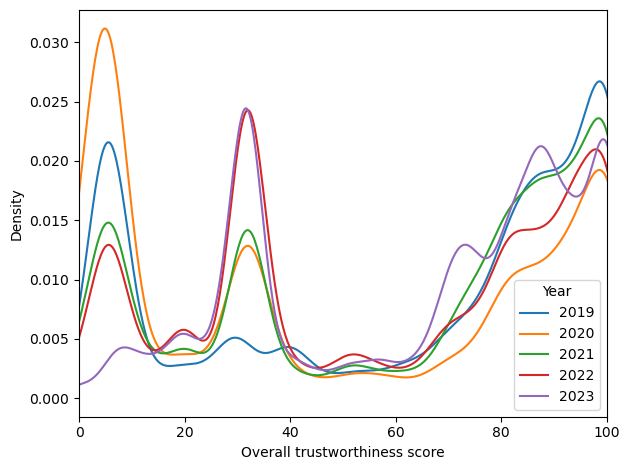

In [48]:
# trustworthiness over time
for date in df15.file_year.unique():
    df15[df15.file_year ==date].Score.plot.kde(
        xlim=(0,100), label=date.strftime("%Y"), bw_method=0.1)
plt.xlabel("Overall trustworthiness score")
plt.ylabel("Density")
plt.legend(title="Year")
plt.tight_layout()
plt.savefig(join(figures_path, "score_distribution_per_year.png"), dpi=300)
plt.show()

In [49]:
df15["year"] = df15["file_year"].astype(str)
year_scores = df15.groupby("year")["Score"].agg(['mean', 'std', 'min', 'max']).reset_index()
print(year_scores)

   year       mean        std  min    max
0  2019  63.421522  36.656865  0.0  100.0
1  2020  48.056994  39.324171  0.0  100.0
2  2021  62.724913  34.869517  0.0  100.0
3  2022  58.526535  33.886679  0.0  100.0
4  2023  65.539911  29.711837  0.0  100.0


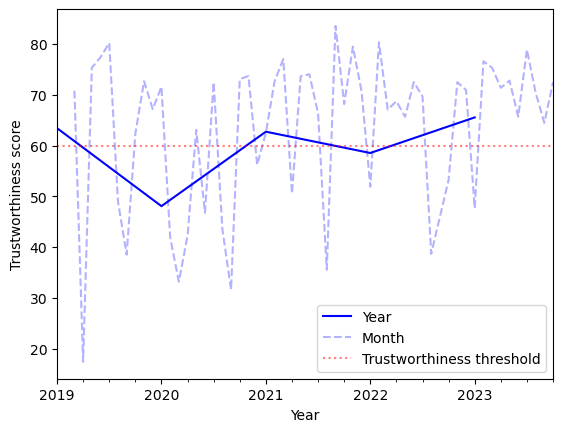

In [50]:
df15.groupby(df15.file_year).Score.mean().plot(color="blue", label="Year")
df15.groupby(df15.file_month).Score.mean().plot(color="blue", label="Month",
                alpha=0.3, linestyle="--")
plt.xlabel("Year")
plt.ylabel("Trustworthiness score")
plt.axhline(y=60, color= "red", linestyle="dotted", 
            alpha=0.5, label="Trustworthiness threshold")
plt.legend()
plt.savefig(join(figures_path,"f3-scores_over_time.png"), dpi=300)
plt.show()

## Added and removed sources

Monthly changes:

In [51]:
changes_month = {}
unique_months = df15.sort_values("file_month")["file_month"].unique()

for i in range(1, len(unique_months)):
    current_month = unique_months[i]
    previous_month = unique_months[i - 1]
    
    added_month = set(df15[df15["file_month"] == current_month]["Domain"].tolist()) - set(df15[df15["file_month"] == previous_month]["Domain"].tolist())
    removed_month = set(df15[df15["file_month"] == previous_month]["Domain"].tolist()) - set(df15[df15["file_month"] == current_month]["Domain"].tolist())
    changes_month[current_month] = added_month, removed_month

for month, changes in list(changes_month.items())[:10]:
    added_count_month = len(changes[0])
    removed_count_month = len(changes[1])
    print(f'{month} Sources added: {added_count_month}, Sources removed: {removed_count_month}')

2019-04 Sources added: 60, Sources removed: 2354
2019-05 Sources added: 298, Sources removed: 310
2019-06 Sources added: 240, Sources removed: 274
2019-07 Sources added: 198, Sources removed: 287
2019-08 Sources added: 509, Sources removed: 197
2019-09 Sources added: 215, Sources removed: 247
2019-10 Sources added: 216, Sources removed: 454
2019-11 Sources added: 321, Sources removed: 244
2019-12 Sources added: 330, Sources removed: 318
2020-01 Sources added: 201, Sources removed: 323


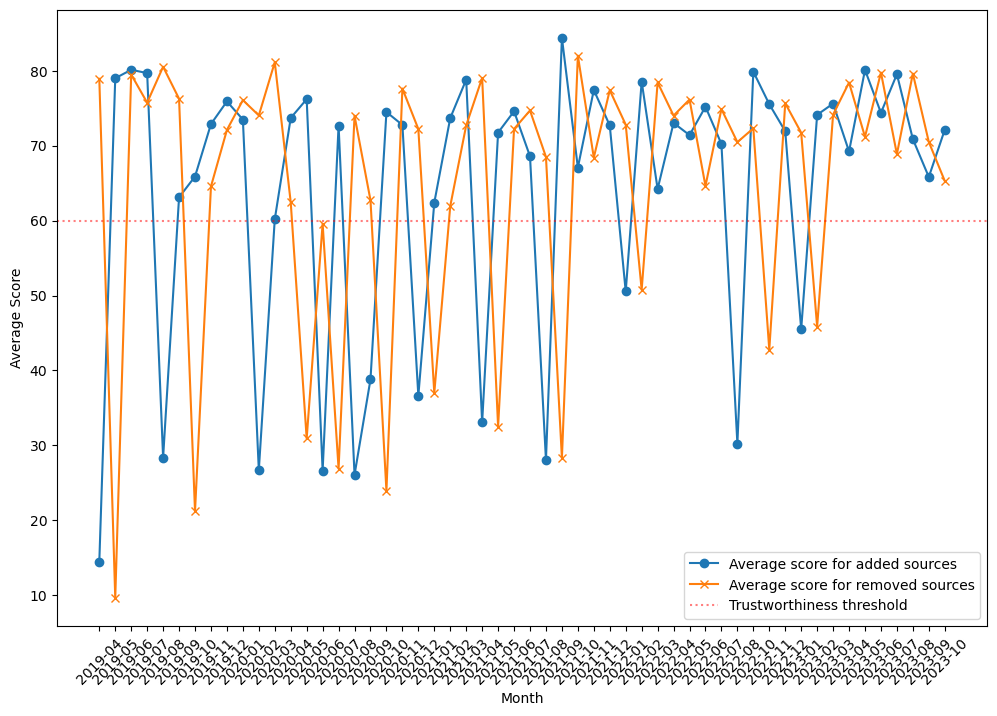

In [52]:
added_scores = []
removed_scores = []
months = []

for date in changes_month.keys():
    added_sources = df15[df15.Domain.isin(changes_month[date][0])]
    removed_sources = df15[df15.Domain.isin(changes_month[date][1])]
    
    added_mean = added_sources["Score"].mean()
    removed_mean = removed_sources["Score"].mean()
    
    added_scores.append(added_mean)
    removed_scores.append(removed_mean)
    months.append(date.strftime('%Y-%m'))

plt.figure(figsize=(12, 8))
plt.plot(months, added_scores, marker='o', label='Average score for added sources')
plt.plot(months, removed_scores, marker='x', label='Average score for removed sources')
plt.xlabel('Month')
plt.ylabel('Average Score')
plt.axhline(y=60, color= "red", linestyle="dotted", 
            alpha=0.5, label="Trustworthiness threshold")
plt.xticks(rotation=45)
plt.legend()
#plt.tight_layout()
plt.show()

In [53]:
domain_list_added = []
domain_list_removed = []
for date in changes_month.keys():
    domain_list_added.extend(changes_month[date][0])
    domain_list_removed.extend(changes_month[date][1])

print(f"Total number of added sources: {len(domain_list_added)}")
print(f"Total number of removed sources: {len(domain_list_removed)}")

Total number of added sources: 32744
Total number of removed sources: 35008


In [54]:
added_mean = df15[df15.Domain.isin(domain_list_added)]["Score"].mean()
removed_mean = df15[df15.Domain.isin(domain_list_removed)]["Score"].mean()
added_std = df15[df15.Domain.isin(domain_list_added)]["Score"].std()
removed_std = df15[df15.Domain.isin(domain_list_removed)]["Score"].std()
print(f"Overall mean for added sources: {added_mean}, SD: {added_std}.")
print(f"Overall mean for removed sources: {removed_mean}, SD: {removed_std}.")

Overall mean for added sources: 59.13650931733895, SD: 35.60378082985424.
Overall mean for removed sources: 59.14021836160132, SD: 35.60571995605501.


Yearly changes:

In [55]:
changes_year = {}
unique_years = df15.sort_values("file_year")["file_year"].unique()

for i in range(1, len(unique_years)):
    current_year = unique_years[i]
    previous_year = unique_years[i - 1]
    
    added_year = set(df15[df15["file_year"] == current_year]["Domain"].tolist()) - set(df15[df15["file_year"] == previous_year]["Domain"].tolist())
    removed_year = set(df15[df15["file_year"] == previous_year]["Domain"].tolist()) - set(df15[df15["file_year"] == current_year]["Domain"].tolist())
    
    changes_year[current_year] = added_year, removed_year
    
for year, changes in changes_year.items():
    added_count_year = len(changes[0])
    removed_count_year = len(changes[1])
    print(f'{year} Sources added: {added_count_year}, Sources removed: {removed_count_year}')

2020 Sources added: 2319, Sources removed: 838
2021 Sources added: 1913, Sources removed: 378
2022 Sources added: 1833, Sources removed: 602
2023 Sources added: 1520, Sources removed: 3435


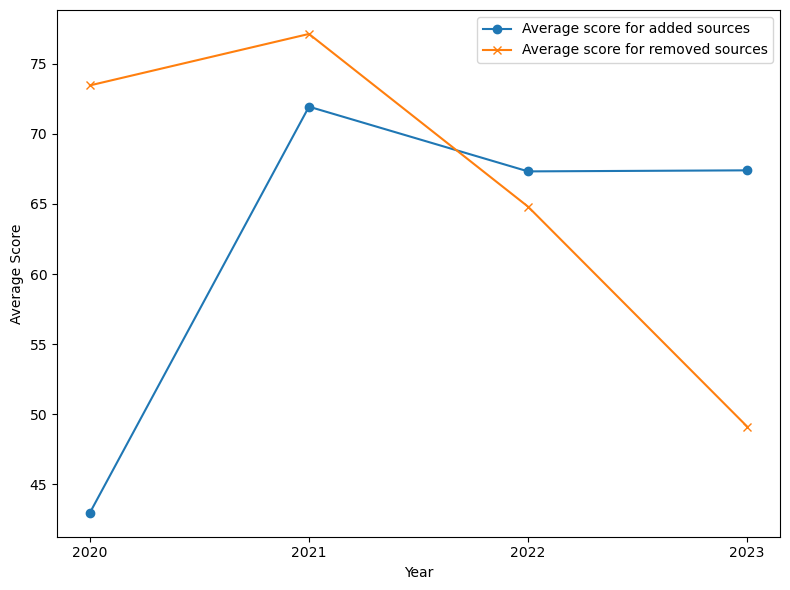

In [56]:
added_scores_yrs = []
removed_scores_yrs = []
years = []

for date in changes_year.keys():
    added_sources_yrs = df15[df15.Domain.isin(changes_year[date][0])]
    removed_sources_yrs = df15[df15.Domain.isin(changes_year[date][1])]
    
    added_mean_yrs = added_sources_yrs["Score"].mean()
    removed_mean_yrs = removed_sources_yrs["Score"].mean()
    
    added_scores_yrs.append(added_mean_yrs)
    removed_scores_yrs.append(removed_mean_yrs)
    years.append(date.strftime('%Y'))

plt.figure(figsize=(8, 6))
plt.plot(years, added_scores_yrs, marker='o', label='Average score for added sources')
plt.plot(years, removed_scores_yrs, marker='x', label='Average score for removed sources')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.xticks()
plt.legend()
plt.tight_layout()
plt.show()

In [57]:
added_scores_yrs

[42.98304398668706, 71.92636386386387, 67.31463055094896, 67.38893988067922]

In [58]:
removed_scores_yrs

[73.44282986847688, 77.1104905293832, 64.80090618336887, 49.12890381983327]

## Last Updated

In [59]:
df15["Last Updated"]=pd.to_datetime(df15["Last Updated"],unit="ms")
df15["Last Updated"].head(3)

0   2018-07-20 14:03:17.020
1   2018-07-20 14:03:21.115
2   2018-07-20 14:03:25.883
Name: Last Updated, dtype: datetime64[ns]

In [60]:
domain_updates_sorted = df15.groupby("Domain").apply(
                        lambda x: x.sort_values("Last Updated")
                        ).reset_index(drop=True)
domain_updates_sorted.head(3)

UUID         Domain        Parent Domain  \
0  b9704871-32df-4721-881c-2dc6d03d8905  1000logos.net                  NaN   
1  07be0795-9c5e-43ad-932b-e7e0154d5828   100fedup.com  100percentfedup.com   
2  a7cfbf89-68cf-4a16-9b92-96cbda6cdad5   100fedup.com  100percentfedup.com   

  Rating  Score            Last Updated Country Language  \
0     FL    NaN 2023-09-27 04:25:20.721      US       en   
1      N    7.5 2018-09-08 22:26:33.205      US       en   
2      N    7.5 2019-10-04 23:22:52.632      US       en   

  Does not repeatedly publish false content  \
0                                       NaN   
1                                        No   
2                                        No   

  Gathers and presents information responsibly  ... ANDROIDAPP OTHER  \
0                                          NaN  ...        NaN   NaN   
1                                           No  ...        NaN   NaN   
2                                           No  ...        NaN   NaN   

  Contact Mail Form URL.1 Communities Served BrandGuard Segments  \
0                     NaN                NaN                 NaN   
1                     NaN                NaN                 NaN   
2                     NaN                NaN                 NaN   

  False Narratives file_month    file_day file_year  year  
0              NaN    2023-10  2023-10-15      2023  2023  
1              NaN    2019-03  2019-03-15      2019  2019  
2              NaN    2019-10  2019-10-15      2019  2019  

[3 rows x 67 columns]

In [61]:
domain_updates_diff = domain_updates_sorted.groupby("Domain")["Last Updated"].diff()

In [62]:
mean_diff_per_domain = domain_updates_diff.groupby(domain_updates_sorted['Domain']).mean()
print(mean_diff_per_domain)

Domain
1000logos.net                                  NaT
100fedup.com              242 days 20:33:44.148500
100giornidaleoni.it    121 days 23:40:35.276333334
100milefreepress.net                           NaT
100percentfedup.com    261 days 09:45:57.592285716
                                   ...            
zonazealots.com           420 days 05:06:58.393000
zt.20minut.ua                                  NaT
zuerst.de              140 days 00:42:35.585571428
zurzeit.at                  0 days 00:00:01.480000
zvw.de                    174 days 13:53:17.657400
Name: Last Updated, Length: 10168, dtype: timedelta64[ns]


In [63]:
print(f'The average time difference between updates is: {mean_diff_per_domain.mean()} days, SD={mean_diff_per_domain.std()}.')
print(f'The range of time differences between updates is: max={mean_diff_per_domain.max()}, min={mean_diff_per_domain.min()} days.')

The average time difference between updates is: 279 days 11:02:28.298169388 days, SD=126 days 23:57:42.207242418.
The range of time differences between updates is: max=1109 days 19:36:32.340000, min=0 days 00:00:00.986000 days.


In [64]:
domain_updates_sorted["Score_diff"] = domain_updates_sorted.groupby("Domain")["Score"].diff()
domain_score_diff = domain_updates_sorted.groupby("Domain")["Score_diff"].mean()
print(f'The average score difference between updates is: {domain_score_diff.mean()}, SD={domain_score_diff.std()}.')
print(f'The range of score differences is: max={domain_score_diff.max()}, min={domain_score_diff.min()}')

The average score difference between updates is: -0.39525259941762675, SD=4.118787190792775.
The range of score differences is: max=62.5, min=-34.5


In [65]:
domain_updates_sorted["Score_diff"].value_counts().sort_values(ascending=False).head(5)

 0.0     27917
-7.5      1097
 12.5      840
 7.5       830
 5.0       701
Name: Score_diff, dtype: int64

<Axes: >

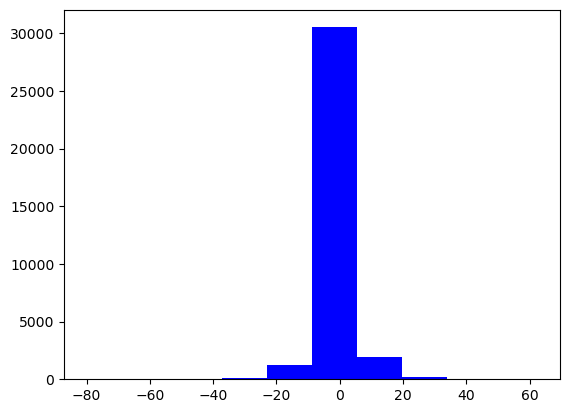

In [66]:
domain_updates_sorted["Score_diff"].hist(color="blue",grid=False)

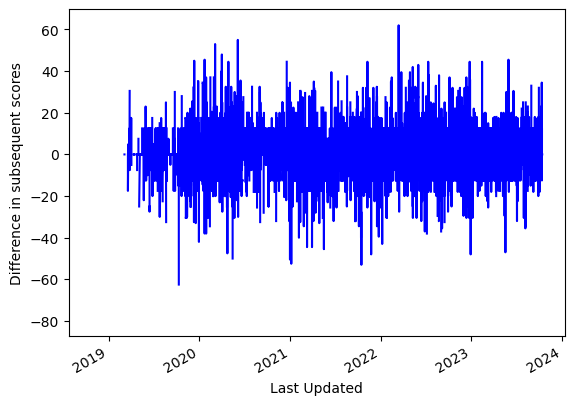

In [67]:
domain_updates_sorted.groupby(domain_updates_sorted["Last Updated"]).Score_diff.mean().plot(color="blue")
plt.ylabel("Difference in subsequent scores")
plt.xlabel("Last Updated")

plt.savefig(join(figures_path, "f4-score_updates.png"), dpi=300)
plt.show()

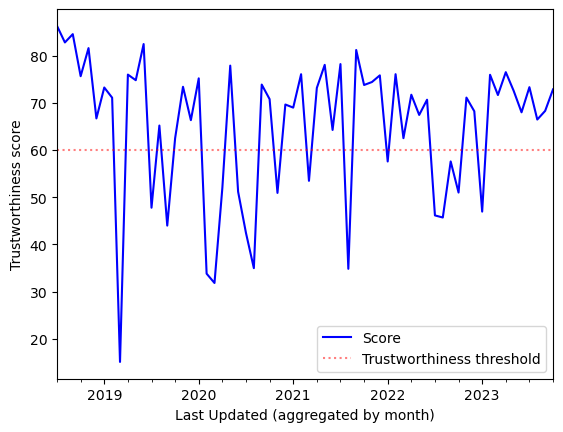

In [68]:
df15["last_updated_month"] = pd.to_datetime(df15["Last Updated"]).dt.to_period("M")
df15.groupby(df15.last_updated_month).Score.mean().plot(color="blue", label="Score")
plt.xlabel("Last Updated (aggregated by month)")
plt.ylabel("Trustworthiness score")
plt.axhline(y=60, color="red", linestyle="dotted", alpha=0.5, label="Trustworthiness threshold")
plt.legend()
plt.show()

In [69]:
#sort by score diff and print domain name and score diff
domain_updates_sorted.sort_values("Score_diff", ascending=True)[["Domain", "Score_diff", "Last Updated"]].head(10)

Domain  Score_diff            Last Updated
7079   conservativedailynews.com       -80.0 2020-11-23 21:39:32.187
37650          thefederalist.com       -62.5 2019-10-10 17:21:38.137
38273       theragingpatriot.com       -53.0 2021-10-15 12:19:44.207
38164            theohiostar.com       -52.5 2021-01-05 22:53:34.221
29611              pluralist.com       -50.5 2020-12-31 18:12:44.411
23272          mindbodygreen.com       -50.0 2020-05-14 13:34:53.487
7119      conservativereview.com       -48.0 2021-11-23 22:24:23.150
19364                   kusi.com       -48.0 2022-12-29 20:18:24.788
27951         onegreenplanet.org       -47.5 2020-04-23 11:14:18.844
31557       redstateobserver.com       -47.0 2023-05-18 22:04:09.100

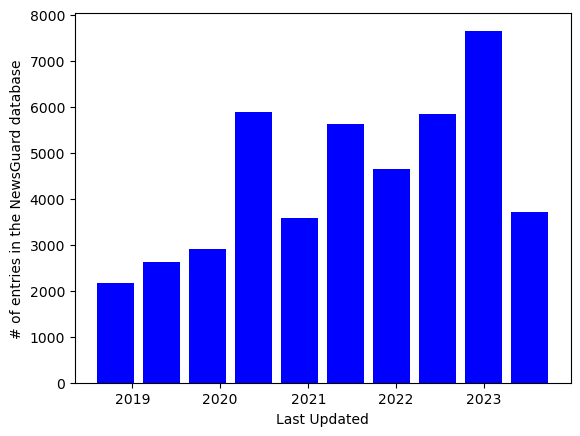

In [70]:
df15["Last Updated"].hist(bins=10, color="blue", rwidth=0.8, grid=False)
plt.xlabel("Last Updated")
plt.ylabel("# of entries in the NewsGuard database")
#plt.savefig(join(figures_path, "last_updated_distribution.png"), dpi=300)
plt.show()

## Criteria
From the website:
1. Does not repeatedly publish false content: The site does not repeatedly and currently produce content that has been found to be clearly and significantly false, and which has not been quickly and prominently corrected. There is a “high bar” for failing this criterion. In practice, it means that on any given day the website is likely to display significantly false content. (22 Points.)
2. Gathers and presents information responsibly: Content providers are generally fair and accurate in reporting and presenting information. They reference multiple sources, preferably those that present direct, firsthand information on a subject or event or from credible secondhand news sources, and they do not egregiously distort or misrepresent information to make an argument or report on a subject. (18 Points)
3. Regularly corrects or clarifies errors: The site has effective practices for identifying errors and for publishing clarifications and corrections, transparently acknowledges errors, and does not regularly leave significant false content uncorrected. (12.5 Points)
4. Handles the difference between news and opinion responsibly: Content providers who convey the impression that they report news or a mix of news and opinion distinguish opinion from news reporting, and when reporting news, do not egregiously cherry pick facts or stories to advance opinions. Content providers who advance a particular point of view disclose that point of view. (12.5 Points)
5. Avoids deceptive headlines: The site generally does not publish headlines that include false information, significantly sensationalize, or otherwise do not reflect what is actually in the content under the headline. (10 Points)
6. Website discloses ownership and financing: The site discloses in a user-friendly manner its ownership and/or financing, as well as any notable political affiliations or financial interests relevant to the site’s coverage held by those with a significant financial interest in the site. Put simply, the reader should know who is funding the content and what relevant interests the owner or funder might have in the content. (7.5 Points)
7. Clearly labels advertising: The site makes clear which content is paid for and which is not. (7.5 Points)
8. Reveals who’s in charge, including possible conflicts of interest: Those in charge of the content are identified on the site, and there is a way for readers to contact the site about editorial issues. In other words, the reader is told who is in charge of deciding what content is published. (5 Points)
9. The site provides the names of content creators, along with either contact or biographical information: Information about those producing the content is made accessible on the site, and it is generally clear who produces which content. (5 Points) 

In [71]:
most_recent.rename(columns={
    "Reveals who's in charge, including any possible conflicts of interest": 
    "Reveals who's in charge,\n including any possible conflicts of interest", 
    "The site provides names of content creators, along with either contact or biographical information":
    "The site provides names of content creators,\n along with either contact or biographical information"
}, inplace=True)

df15.rename(columns={
    "Reveals who's in charge, including any possible conflicts of interest": 
    "Reveals who's in charge,\n including any possible conflicts of interest", 
    "The site provides names of content creators, along with either contact or biographical information":
    "The site provides names of content creators,\n along with either contact or biographical information"
}, inplace=True)

/tmp/ipykernel_4150666/2077108108.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  most_recent.rename(columns={


In [72]:
criteria_columns = most_recent.columns[8:17]
criteria_columns

Index(['Does not repeatedly publish false content',
       'Gathers and presents information responsibly',
       'Regularly corrects or clarifies errors',
       'Handles the difference between news and opinion responsibly',
       'Avoids deceptive headlines',
       'Website discloses ownership and financing',
       'Clearly labels advertising',
       'Reveals who's in charge,\n including any possible conflicts of interest',
       'The site provides names of content creators,\n along with either contact or biographical information'],
      dtype='object')

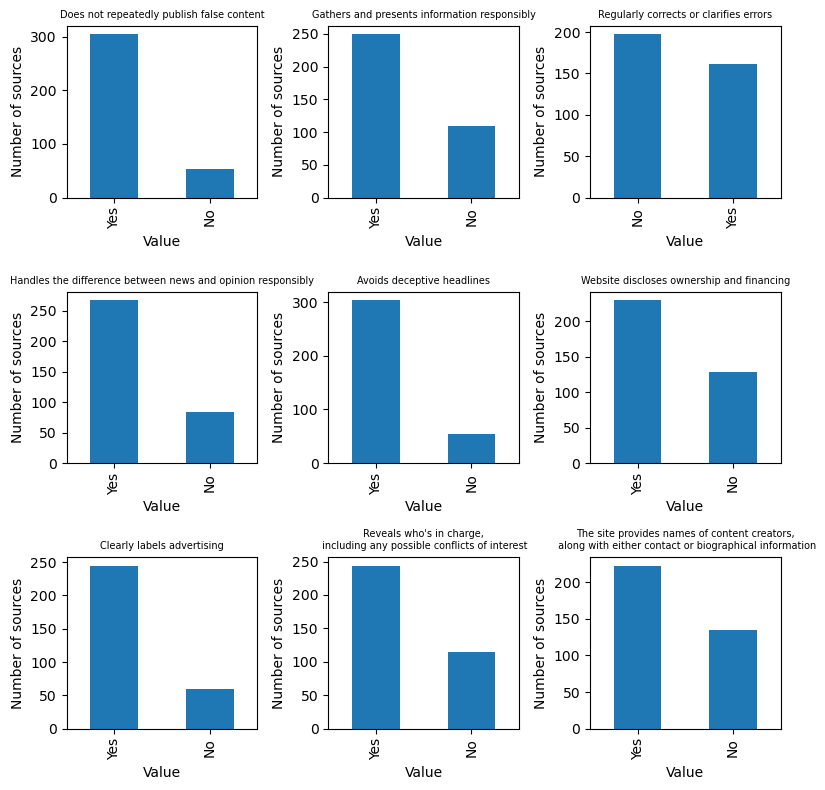

In [73]:
def plot_yesno(columns, most_recent):
    fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))

    for i, col in enumerate(columns):
        row = i // 3 
        col_in_row = i % 3  
        most_recent[col].value_counts().plot(kind="bar", ax=axs[row, col_in_row])
        axs[row, col_in_row].set_xlabel("Value")
        axs[row, col_in_row].set_ylabel("Number of sources")
        axs[row, col_in_row].set_title(f'{col}', fontsize=7)

    plt.tight_layout()
    plt.show()

plot_yesno(criteria_columns, most_recent)

In [74]:
for col in criteria_columns:
    print(f"{col}: {most_recent[col].value_counts()[0]}")

Does not repeatedly publish false content: 304
Gathers and presents information responsibly: 249
Regularly corrects or clarifies errors: 197
Handles the difference between news and opinion responsibly: 268
Avoids deceptive headlines: 304
Website discloses ownership and financing: 230
Clearly labels advertising: 245
Reveals who's in charge,
 including any possible conflicts of interest: 244
The site provides names of content creators,
 along with either contact or biographical information: 223


In [75]:
#calculate percentages
for col in criteria_columns:
    print(f"{col}: {most_recent[col].value_counts()[0]/len(most_recent)*100}")

Does not repeatedly publish false content: 68.16143497757847
Gathers and presents information responsibly: 55.82959641255605
Regularly corrects or clarifies errors: 44.17040358744394
Handles the difference between news and opinion responsibly: 60.0896860986547
Avoids deceptive headlines: 68.16143497757847
Website discloses ownership and financing: 51.569506726457405
Clearly labels advertising: 54.932735426008975
Reveals who's in charge,
 including any possible conflicts of interest: 54.7085201793722
The site provides names of content creators,
 along with either contact or biographical information: 50.0


In [76]:
melted_data = pd.melt(most_recent, value_vars=criteria_columns, 
                      var_name="Criteria", value_name="Label")
reshaped_data = melted_data.groupby(
                        ["Criteria", "Label"]).size().unstack(
                            fill_value=0).reset_index()
reshaped_data

Label                                           Criteria   No  Yes
0                             Avoids deceptive headlines   54  304
1                             Clearly labels advertising   60  245
2              Does not repeatedly publish false content   54  304
3           Gathers and presents information responsibly  109  249
4      Handles the difference between news and opinio...   84  268
5                 Regularly corrects or clarifies errors  197  161
6      Reveals who's in charge,\n including any possi...  114  244
7      The site provides names of content creators,\n...  135  223
8              Website discloses ownership and financing  128  230

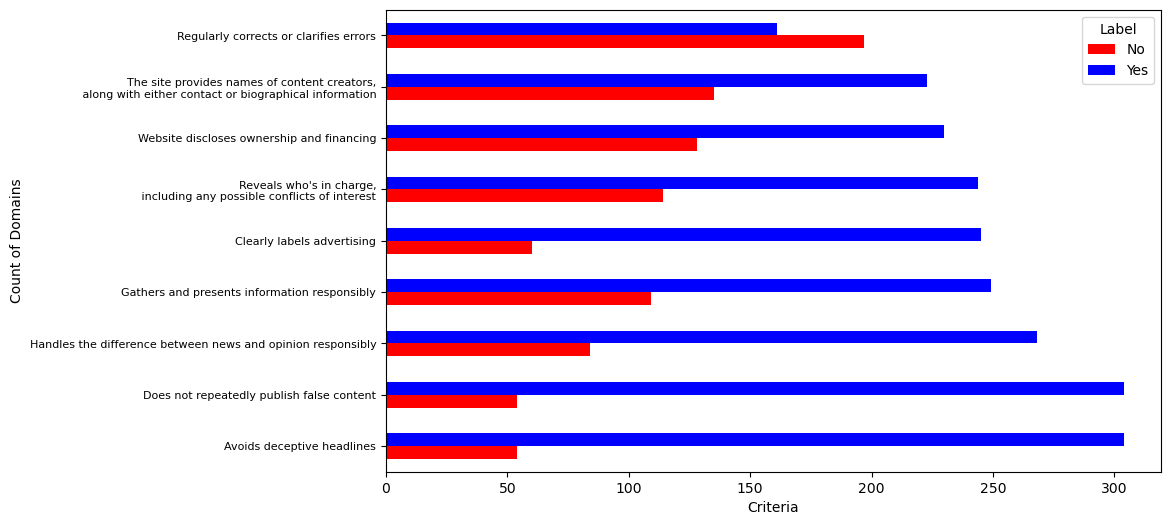

In [77]:
reshaped_data.sort_values("Yes", ascending=False).plot(
    x='Criteria', kind='barh', stacked=False, 
    color=['red', 'blue'], figsize=(10, 6))
plt.xlabel('Criteria')
plt.ylabel('Count of Domains')
plt.yticks(fontsize=8)
plt.legend(title='Label', loc='upper right')
plt.show()

In [78]:
#co-occurence
df15 = df15.replace("Yes", 1)
df15 = df15.replace("No", 0)
criteria_df = df15[criteria_columns]
criteria_df = criteria_df.fillna(0) 
cooccurrence = criteria_df.T.dot(criteria_df)
cooccurrence

Does not repeatedly publish false content  \
Does not repeatedly publish false content                                             32912.0   
Gathers and presents information responsibly                                          24013.0   
Regularly corrects or clarifies errors                                                16034.0   
Handles the difference between news and opinion...                                    23432.0   
Avoids deceptive headlines                                                            31959.0   
Website discloses ownership and financing                                             17501.0   
Clearly labels advertising                                                            21992.0   
Reveals who's in charge,\n including any possib...                                    20581.0   
The site provides names of content creators,\n ...                                    17635.0   

                                                    Gathers and presents information responsibly  \
Does not repeatedly publish false content                                                24013.0   
Gathers and presents information responsibly                                             24017.0   
Regularly corrects or clarifies errors                                                   15292.0   
Handles the difference between news and opinion...                                       22008.0   
Avoids deceptive headlines                                                               23892.0   
Website discloses ownership and financing                                                16440.0   
Clearly labels advertising                                                               19707.0   
Reveals who's in charge,\n including any possib...                                       19246.0   
The site provides names of content creators,\n ...                                       16545.0   

                                                    Regularly corrects or clarifies errors  \
Does not repeatedly publish false content                                          16034.0   
Gathers and presents information responsibly                                       15292.0   
Regularly corrects or clarifies errors                                             16123.0   
Handles the difference between news and opinion...                                 14513.0   
Avoids deceptive headlines                                                         15894.0   
Website discloses ownership and financing                                          11640.0   
Clearly labels advertising                                                         13829.0   
Reveals who's in charge,\n including any possib...                                 13034.0   
The site provides names of content creators,\n ...                                 12616.0   

                                                    Handles the difference between news and opinion responsibly  \
Does not repeatedly publish false content                                                     23432.0             
Gathers and presents information responsibly                                                  22008.0             
Regularly corrects or clarifies errors                                                        14513.0             
Handles the difference between news and opinion...                                            24955.0             
Avoids deceptive headlines                                                                    23501.0             
Website discloses ownership and financing                                                     16301.0             
Clearly labels advertising                                                                    20041.0             
Reveals who's in charge,\n including any possib...                                            18871.0             
The site provides names of content creators,\n ...                                            16238.0   

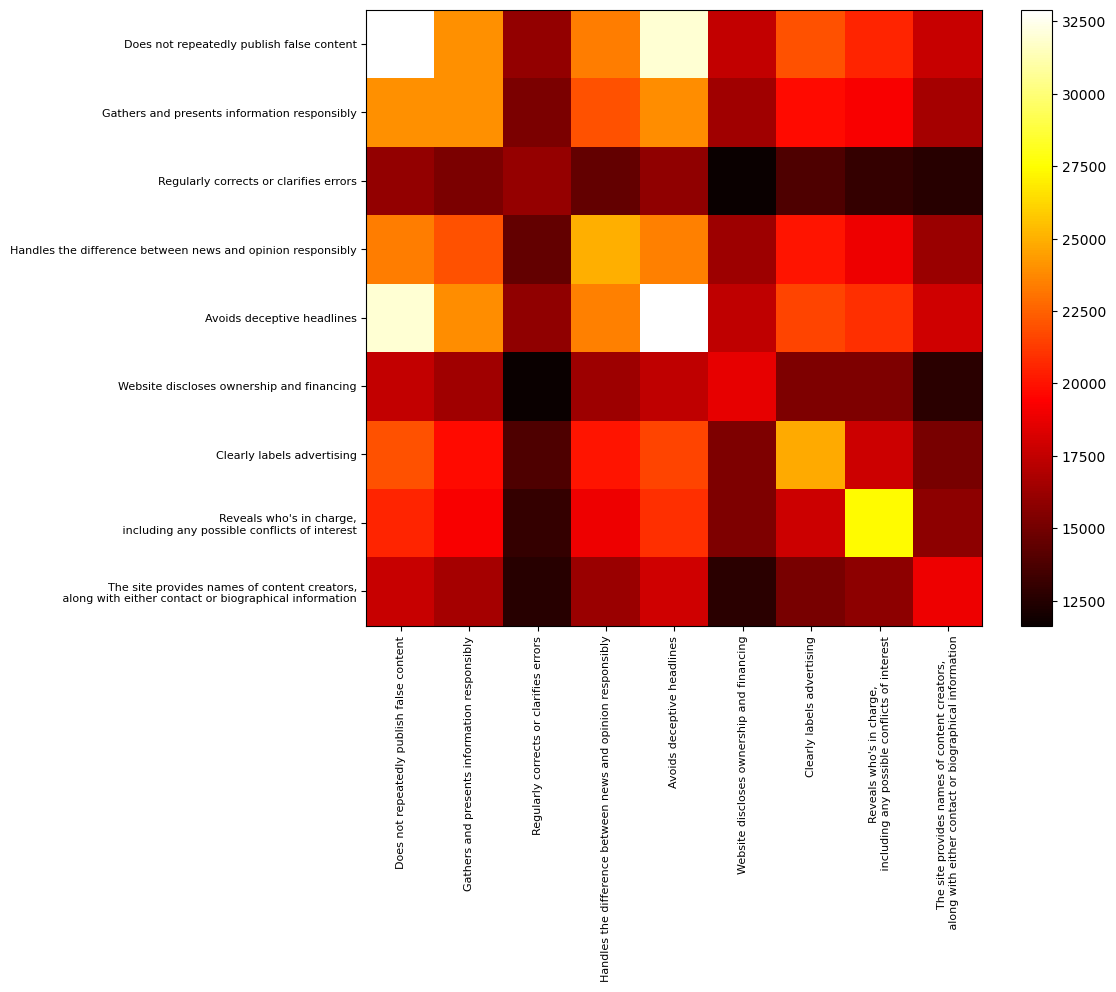

In [79]:
plt.figure(figsize=(10, 8))
plt.imshow(cooccurrence, cmap='hot', interpolation='nearest')
plt.xticks(range(len(cooccurrence)), cooccurrence.columns, rotation=90, fontsize=8)
plt.yticks(range(len(cooccurrence)), cooccurrence.index, fontsize=8)
plt.colorbar()
#for i in range(len(cooccurrence)):
#    for j in range(len(cooccurrence)):
#        plt.text(j, i, cooccurrence.iloc[i, j], ha="center", va="center", color="grey")
plt.show()

In [80]:
#correlation matrix
corr = criteria_df.corr()
corr.style.background_gradient(cmap='coolwarm')

In [81]:
#exploratory factor analysis of criteria
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(criteria_df)
chi_square_value, p_value # there is a significant correlation among the variables

(243490.90900352786, 0.0)

In [82]:
#squared partial correlations
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(criteria_df)
kmo_model #adequate sample size (larger than 0.5)

/home/jluehring/miniconda3/envs/twarcing/lib/python3.9/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.8587481981208228

In [83]:
from factor_analyzer.factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(rotation=None)
fa.fit(criteria_df, 25)
ev, v = fa.get_eigenvalues()
ev #2 factors have eigenvalues > 1

array([4.78442535, 1.2894548 , 0.68812335, 0.60359132, 0.51551014,
       0.43710004, 0.3992658 , 0.17973634, 0.10279287])

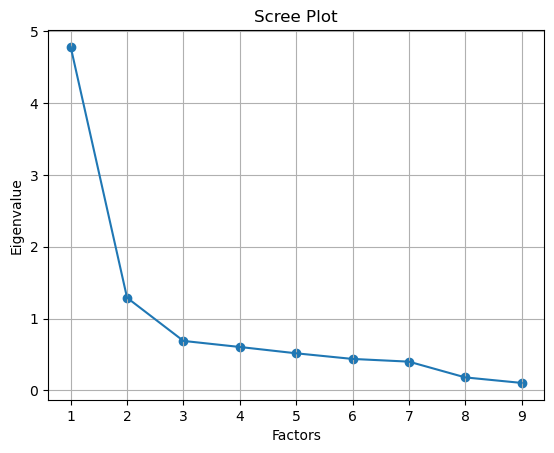

In [84]:
#screeplot
plt.scatter(range(1,criteria_df.shape[1]+1),ev)
plt.plot(range(1,criteria_df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [85]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(n_factors=2, rotation="oblimin")
fa.fit(criteria_df)
loadings = fa.loadings_
loadings_df = pd.DataFrame(loadings, index=criteria_columns)
loadings_df

0         1
Does not repeatedly publish false content           0.023829  0.970126
Gathers and presents information responsibly        0.781254  0.209614
Regularly corrects or clarifies errors              0.653351  0.070017
Handles the difference between news and opinion...  0.721021  0.132482
Avoids deceptive headlines                          0.091098  0.852739
Website discloses ownership and financing           0.678366 -0.005904
Clearly labels advertising                          0.622479  0.024948
Reveals who's in charge,\n including any possib...  0.686080 -0.352910
The site provides names of content creators,\n ...  0.694903 -0.008376

In [86]:
#variance explained
fa.get_factor_variance()[0]

array([3.36721986, 1.85997264])

In [87]:
#in percentage
fa.get_factor_variance()[2]*100

array([37.413554  , 58.07991663])

In [88]:
#regression: which criteria are most important for the overall score?
for criteria in criteria_columns:
    df15 = df15.dropna(subset=[criteria])
    df15 = df15.dropna(subset=["Score"])
    X = df15[criteria]
    y = df15["Score"]
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    predictions = model.predict(X)
    print(f'Criteria: {criteria}')
    print(f'Coefficient: {model.params[criteria]}')
    print(f'P-value: {model.pvalues[criteria]}')

Criteria: Does not repeatedly publish false content
Coefficient: 65.14316725812978
P-value: 0.0
Criteria: Gathers and presents information responsibly
Coefficient: 65.54216211735437
P-value: 0.0
Criteria: Regularly corrects or clarifies errors
Coefficient: 53.42391875939191
P-value: 0.0
Criteria: Handles the difference between news and opinion responsibly
Coefficient: 58.92542306619614
P-value: 0.0
Criteria: Avoids deceptive headlines
Coefficient: 63.64866848541569
P-value: 0.0
Criteria: Website discloses ownership and financing
Coefficient: 47.7472478423319
P-value: 0.0
Criteria: Clearly labels advertising
Coefficient: 49.482095366786176
P-value: 0.0
Criteria: Reveals who's in charge,
 including any possible conflicts of interest
Coefficient: 25.310371593552336
P-value: 0.0
Criteria: The site provides names of content creators,
 along with either contact or biographical information
Coefficient: 48.44967270116245
P-value: 0.0


In [89]:
#multiple combinations of criteria
combinations = criteria_df.groupby(criteria_columns.tolist()).size().reset_index(name="Counts")
combinations["Percentage"] = combinations["Counts"]/len(df15)*100
combinations.sort_values("Counts", ascending=False).head(10)

Does not repeatedly publish false content  \
268                                        1.0   
89                                         1.0   
2                                          0.0   
0                                          0.0   
260                                        1.0   
225                                        1.0   
224                                        1.0   
267                                        1.0   
4                                          0.0   
266                                        1.0   

     Gathers and presents information responsibly  \
268                                           1.0   
89                                            0.0   
2                                             0.0   
0                                             0.0   
260                                           1.0   
225                                           1.0   
224                                           1.0   
267                                           1.0   
4                                             0.0   
266                                           1.0   

     Regularly corrects or clarifies errors  \
268                                     1.0   
89                                      0.0   
2                                       0.0   
0                                       0.0   
260                                     1.0   
225                                     0.0   
224                                     0.0   
267                                     1.0   
4                                       0.0   
266                                     1.0   

     Handles the difference between news and opinion responsibly  \
268                                                1.0             
89                                                 0.0             
2                                                  0.0             
0                                                  0.0             
260                                                1.0             
225                                                1.0             
224                                                1.0             
267                                                1.0             
4                                                  0.0             
266                                                1.0             

     Avoids deceptive headlines  Website discloses ownership and financing  \
268                         1.0                                        1.0   
89                          1.0                                        0.0   
2                           0.0                                        0.0   
0                           0.0                                        0.0   
260                         1.0                                        0.0   
225                         1.0                                        1.0   
224                         1.0                                        1.0   
267                         1.0                                        1.0   
4                           0.0                                        0.0   
266                         1.0                                        1.0   

     Clearly labels advertising  \
268                         1.0   
89                          0.0   
2                           0.0   
0                           0.0   
260                         1.0   
225                         1.0   
224                         1.0   
267                         1.0   
4                           1.0   
266                         1.0   

     Reveals who's in charge,\n including any possible conflicts of interest  \
268                                                1.0                         
89                                                 0.0                         
2                                                  1.0                         
0                                     

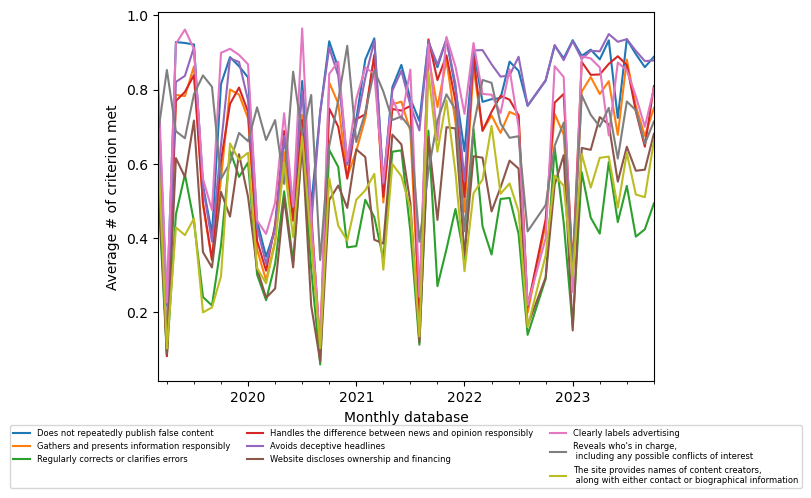

In [90]:
#criteria changes over time 
criteria_avg = df15.groupby("file_month")[criteria_columns].mean()
for col in criteria_columns:
    criteria_avg[col].plot(label=col)
plt.xlabel("Monthly database")
plt.ylabel("Average # of criterion met")
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3, fontsize=6)
plt.show()

In [91]:
#changes over time per criterion per domain
criteria_dated = df15.groupby("Domain").apply(
                        lambda x: x.sort_values("Last Updated")
                        ).reset_index(drop=True)

criteria_dated.head(3)

UUID        Domain        Parent Domain  \
0  07be0795-9c5e-43ad-932b-e7e0154d5828  100fedup.com  100percentfedup.com   
1  a7cfbf89-68cf-4a16-9b92-96cbda6cdad5  100fedup.com  100percentfedup.com   
2  acc17564-3c74-434e-8f19-19960dc2cd49  100fedup.com  100percentfedup.com   

  Rating  Score            Last Updated Country Language  \
0      N    7.5 2018-09-08 22:26:33.205      US       en   
1      N    7.5 2019-10-04 23:22:52.632      US       en   
2      N    7.5 2019-12-27 19:08:32.749      US       en   

   Does not repeatedly publish false content  \
0                                        0.0   
1                                        0.0   
2                                        0.0   

   Gathers and presents information responsibly  ...  OTHER  \
0                                           0.0  ...    NaN   
1                                           0.0  ...    NaN   
2                                           0.0  ...    NaN   

   Contact Mail Form URL.1  Communities Served  BrandGuard Segments  \
0                      NaN                 NaN                  NaN   
1                      NaN                 NaN                  NaN   
2                      NaN                 NaN                  NaN   

   False Narratives  file_month    file_day file_year  year last_updated_month  
0               NaN     2019-03  2019-03-15      2019  2019            2018-09  
1               NaN     2019-10  2019-10-15      2019  2019            2019-10  
2               NaN     2020-01  2020-01-15      2020  2020            2019-12  

[3 rows x 68 columns]

In [92]:
criteria_diffs = pd.DataFrame()
for criterion in criteria_columns:
    criteria_dated[f'Diff_{criterion}'] = criteria_dated.groupby("Domain")[criterion].diff()
    criteria_diffs[f'Diff_{criterion}'] = criteria_dated[f'Diff_{criterion}']
criteria_diffs.tail(10)

Diff_Does not repeatedly publish false content  \
40092                                             0.0   
40093                                             0.0   
40094                                             NaN   
40095                                             0.0   
40096                                             NaN   
40097                                             0.0   
40098                                             0.0   
40099                                             0.0   
40100                                             0.0   
40101                                             0.0   

       Diff_Gathers and presents information responsibly  \
40092                                                0.0   
40093                                                0.0   
40094                                                NaN   
40095                                                0.0   
40096                                                NaN   
40097                                                0.0   
40098                                                0.0   
40099                                                0.0   
40100                                                0.0   
40101                                                0.0   

       Diff_Regularly corrects or clarifies errors  \
40092                                          0.0   
40093                                          0.0   
40094                                          NaN   
40095                                          0.0   
40096                                          NaN   
40097                                          0.0   
40098                                          0.0   
40099                                          0.0   
40100                                          0.0   
40101                                          0.0   

       Diff_Handles the difference between news and opinion responsibly  \
40092                                                0.0                  
40093                                                0.0                  
40094                                                NaN                  
40095                                                0.0                  
40096                                                NaN                  
40097                                                0.0                  
40098                                                0.0                  
40099                                                0.0                  
40100                                                0.0                  
40101                                                0.0                  

       Diff_Avoids deceptive headlines  \
40092                              0.0   
40093                              0.0   
40094                              NaN   
40095                              0.0   
40096                              NaN   
40097                              0.0   
40098                              0.0   
40099                              0.0   
40100                              0.0   
40101                              0.0   

       Diff_Website discloses ownership and financing  \
40092                                             0.0   
40093                                             0.0   
40094                                             NaN   
40095                                             0.0   
40096                                             NaN   
40097                                             0.0   
40098                                             0.0   
40099                                             0.0   
40100                                             0.0   
40101                                             0.0   

       Diff_Clearly labels advertising  \
40092                              0.0   
40093                              0.0   
40094                              NaN   
40095                              0.0

In [93]:
average_change = criteria_diffs.mean()
average_change

Diff_Does not repeatedly publish false content                                                               0.000638
Diff_Gathers and presents information responsibly                                                           -0.001053
Diff_Regularly corrects or clarifies errors                                                                  0.005617
Diff_Handles the difference between news and opinion responsibly                                             0.004914
Diff_Avoids deceptive headlines                                                                              0.002553
Diff_Website discloses ownership and financing                                                              -0.007850
Diff_Clearly labels advertising                                                                             -0.019530
Diff_Reveals who's in charge,\n including any possible conflicts of interest                                -0.001532
Diff_The site provides names of content creators,\n alon

In [94]:
total_change = criteria_diffs.astype(bool).sum()
print(total_change)

Diff_Does not repeatedly publish false content                                                                8930
Diff_Gathers and presents information responsibly                                                             9039
Diff_Regularly corrects or clarifies errors                                                                  10262
Diff_Handles the difference between news and opinion responsibly                                              9242
Diff_Avoids deceptive headlines                                                                               9000
Diff_Website discloses ownership and financing                                                               10868
Diff_Clearly labels advertising                                                                              10070
Diff_Reveals who's in charge,\n including any possible conflicts of interest                                  9788
Diff_The site provides names of content creators,\n along with either contact or

In [95]:
negative_changes = (criteria_diffs < 0).sum()
(negative_changes/criteria_dated.Domain.nunique()*100).sort_values(ascending=False)

Diff_Website discloses ownership and financing                                                               13.392653
Diff_Clearly labels advertising                                                                              10.928588
Diff_Regularly corrects or clarifies errors                                                                   7.529090
Diff_The site provides names of content creators,\n along with either contact or biographical information     6.240018
Diff_Reveals who's in charge,\n including any possible conflicts of interest                                  6.103126
Diff_Handles the difference between news and opinion responsibly                                              1.836642
Diff_Gathers and presents information responsibly                                                             1.745380
Diff_Avoids deceptive headlines                                                                               0.878394
Diff_Does not repeatedly publish false content  

In [96]:
positive_changes = (criteria_diffs > 0).sum()
(positive_changes/criteria_dated.Domain.nunique()*100).sort_values(ascending=False)

Diff_Website discloses ownership and financing                                                               10.586356
Diff_Regularly corrects or clarifies errors                                                                   9.536847
Diff_The site provides names of content creators,\n along with either contact or biographical information     7.403605
Diff_Reveals who's in charge,\n including any possible conflicts of interest                                  5.555556
Diff_Clearly labels advertising                                                                               3.947068
Diff_Handles the difference between news and opinion responsibly                                              3.593429
Diff_Avoids deceptive headlines                                                                               1.791011
Diff_Gathers and presents information responsibly                                                             1.368925
Diff_Does not repeatedly publish false content  

In [97]:
criteria_dated[criteria_dated["Diff_Website discloses ownership and financing"] == -1]["Domain"].unique()

array(['1011now.com', '12thmanrising.com', '13abc.com', ...,
       'yournewswire.com', 'zeit.de', 'zonazealots.com'], dtype=object)

## Countries

In [98]:
table1 = df15.groupby(["Country", "Language"]).agg(
    {"Score": ["mean", "std"], "Domain": "nunique", }).reset_index()
table1.columns = ["Country", "Language", "Score_m", "Score_std", "n"]
table1["Score_m"] = table1["Score_m"].round(2)
table1["Score_std"] = table1["Score_std"].round(2)
table1["\%"] = (table1["n"]/df15["Domain"].nunique()*100).round(2)
table1['Mean (SD)'] = table1.apply(lambda row: f'{row["Score_m"]} ({row["Score_std"]})', axis=1)
table1 = table1.drop(["Score_m", "Score_std"], axis=1)
table1

Country Language     n     \%      Mean (SD)
0      ALL       en  1187  13.54  72.12 (27.81)
1       AT       de    36   0.41  71.87 (29.55)
2       AU       en   115   1.31  68.41 (30.62)
3       CA       en   388   4.43   88.8 (13.41)
4       CA       fr    44   0.50  79.56 (19.55)
5       DE       de   315   3.59   74.62 (32.5)
6       FR       fr   337   3.84  67.78 (28.85)
7       GB       en   565   6.45  81.34 (19.09)
8       IT       it   461   5.26  72.01 (24.92)
9       NZ       en    15   0.17  83.61 (22.35)
10      US       en  6548  74.70  53.77 (37.25)
11      US       es     1   0.01     82.5 (nan)

In [99]:
#save table as latex >turn into function for later tables?
table1_latex = table1.sort_values("n", ascending=False).to_latex(
    index=False, escape=False,
    caption="\\textbf{Country Descriptives and Average Trustworthiness.}",
    label="table:table1", position='H',
    column_format=' X c c c c c c ',
    longtable=False, header=True, na_rep='---', 
    bold_rows=True)

table1_latex = table1_latex.replace("\\begin{tabular}{", "\\begin{tabularx}{\\textwidth}{")
table1_latex = table1_latex.replace("\\end{tabular}", "\\end{tabularx}")

table1_latex = table1_latex.replace("\\bottomrule", "\\bottomrule\n\\textit{Note.} All versions of the database.")

with open(join(tables_path, "t1_countries.tex"), 'w') as f:
    f.write(table1_latex)

/tmp/ipykernel_4150666/4084039274.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  table1_latex = table1.sort_values("n", ascending=False).to_latex(


In [100]:
language_score = df15.groupby(["Language", "file_month"]).agg(
    {"Score": "mean"}).reset_index()
language_score['file_month'] = language_score['file_month'].dt.to_timestamp()

language_score.groupby("Language").Score.mean().sort_values(ascending=False)

Language
es    82.500000
it    68.071571
de    67.567057
fr    65.970581
en    64.329585
Name: Score, dtype: float64

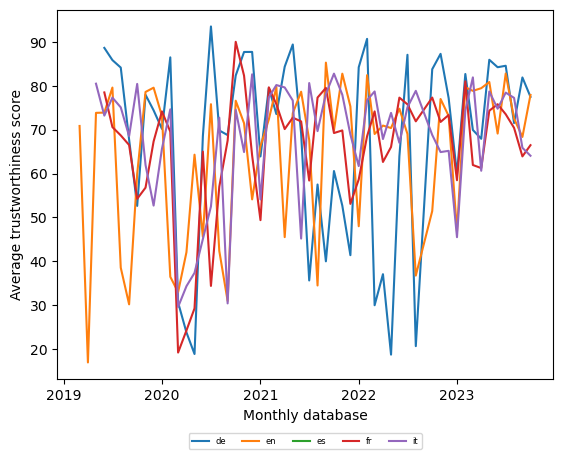

In [101]:
for language in language_score['Language'].unique():
    language_df = language_score[language_score['Language'] == language]
    plt.plot(language_df['file_month'], language_df['Score'], label=language)

plt.xlabel("Monthly database")
plt.ylabel("Average trustworthiness score")
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=len(language_score), fontsize=6)
plt.show()

In [102]:
country_score = df15.groupby(["Country","file_month"]).agg(
    {"Score": "mean"}).reset_index()
country_score['file_month'] = country_score['file_month'].dt.to_timestamp()
country_score.groupby("Country").Score.mean().sort_values(ascending=False)

Country
NZ     84.941964
CA     82.339553
GB     75.886092
AU     73.644915
ALL    69.443941
IT     68.071571
DE     67.985747
AT     65.658854
FR     65.123655
US     61.595097
Name: Score, dtype: float64

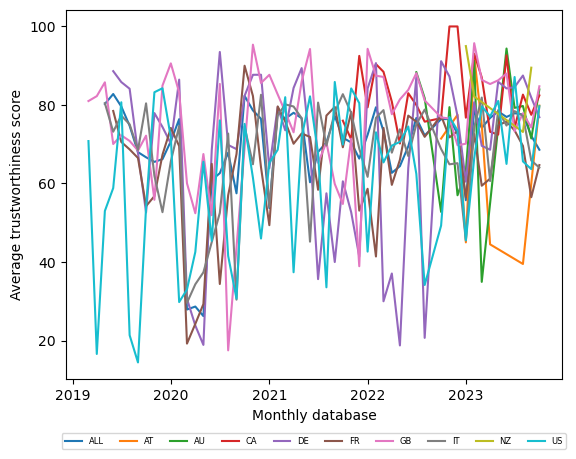

In [103]:
for country in country_score['Country'].unique():
    country_df = country_score[country_score['Country'] == country]
    plt.plot(country_df['file_month'], country_df['Score'], label=country)

plt.xlabel("Monthly database")
plt.ylabel("Average trustworthiness score")
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=len(country_score), fontsize=6)
plt.savefig(join(figures_path,"scores_over_time_per_country.png"), dpi=300)

plt.show()

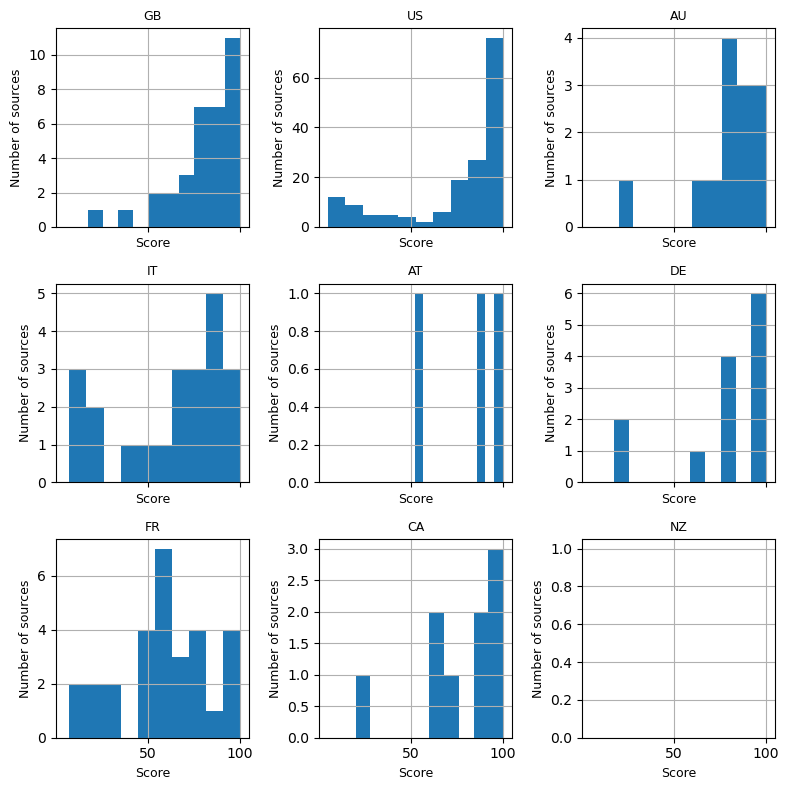

In [104]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(8, 8), sharey=False, sharex=True)
country_df = most_recent[most_recent['Country'] != "ALL"]

for i, country in enumerate(country_df['Country'].unique()):
    row = i // 3 
    col_in_row = i % 3  
    df = country_df[country_df['Country'] == country]
    df['Score'].hist(ax=axs[row, col_in_row])
    axs[row, col_in_row].set_xlabel("Score", fontsize=9)
    axs[row, col_in_row].set_ylabel("Number of sources", fontsize=9)
    axs[row, col_in_row].set_title(f'{country}', fontsize=9)

plt.tight_layout()

plt.savefig(join(figures_path,"scores_per_country_recent.png"), dpi=300)
plt.show()

In [105]:
#do the same with the number of domains over time
country_domains = df15.groupby(["Country","file_month"]).agg(
    {"Domain": "nunique"}).reset_index()
country_domains['file_month'] = country_domains['file_month'].dt.to_timestamp()

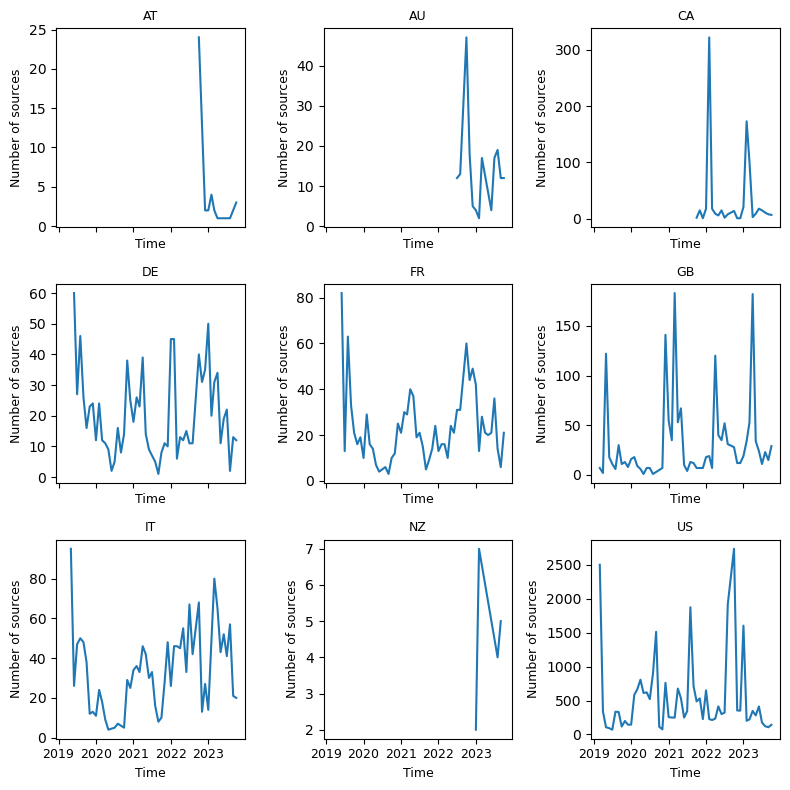

In [106]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(8, 8), sharey=False, sharex=True)
plt.subplots_adjust(hspace=0.5, wspace=0.5)

filtered_countries = country_domains[country_domains["Country"] != "ALL"]["Country"].unique()

for i, country in enumerate(filtered_countries):
    row = i // 3 
    col_in_row = i % 3  
    df = country_domains[country_domains["Country"] == country]  
    axs[row, col_in_row].plot(df["file_month"], df["Domain"], label=country)
    axs[row, col_in_row].set_xlabel("Time", fontsize=9)
    axs[row, col_in_row].set_ylabel("Number of sources", fontsize=9)
    axs[row, col_in_row].set_title(f'{country}', fontsize=9)
    axs[row, col_in_row].tick_params(axis="x", labelsize=9)

plt.tight_layout()
plt.savefig(join(figures_path,"n_country_over_time.png"), dpi=300)
plt.show()

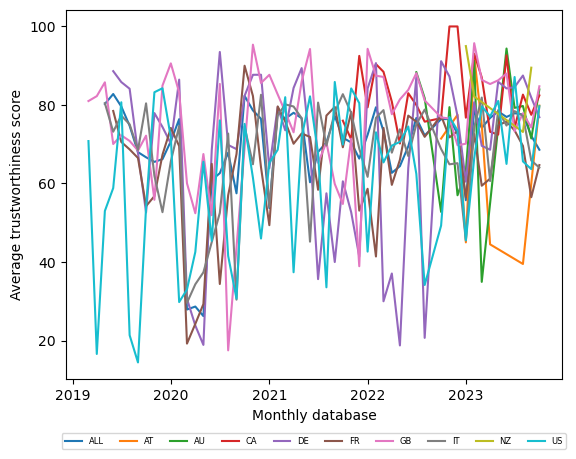

In [107]:
for country in country_score['Country'].unique():
    country_df = country_score[country_score['Country'] == country]
    plt.plot(country_df['file_month'], country_df['Score'], label=country)

plt.xlabel("Monthly database")
plt.ylabel("Average trustworthiness score")
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=len(country_score), fontsize=6)
plt.show()

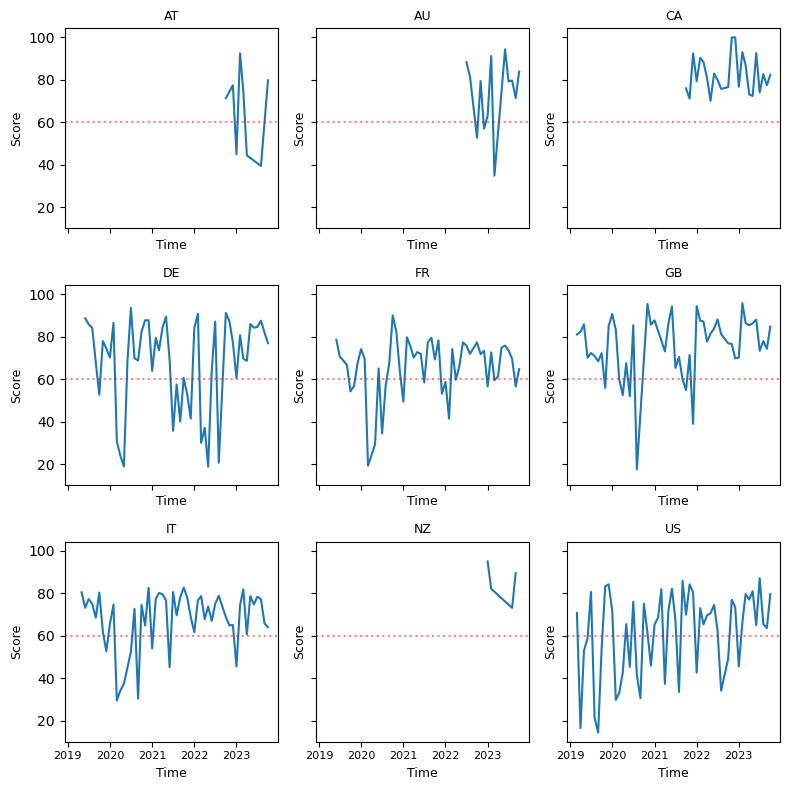

In [108]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(8, 8), sharey=True, sharex=True)
plt.subplots_adjust(hspace=0.5, wspace=0.5)

for i, country in enumerate(filtered_countries):
    row = i // 3 
    col_in_row = i % 3  
    df = country_score[country_score["Country"] == country]  
    axs[row, col_in_row].plot(df["file_month"], df["Score"], label=country)
    axs[row, col_in_row].set_xlabel("Time", fontsize=9)
    axs[row, col_in_row].set_ylabel("Score", fontsize=9)
    axs[row, col_in_row].set_title(f'{country}', fontsize=9)
    axs[row, col_in_row].tick_params(axis="x", labelsize=8)
    axs[row, col_in_row].axhline(y=60, color="red", linestyle="dotted", 
                                 alpha=0.5, label="Trustworthiness threshold")

plt.tight_layout()
plt.savefig(join(figures_path,"f5-scores_country_over_time.png"), dpi=300)
plt.show()

In [109]:
country_updates_diff = domain_updates_sorted.groupby("Country")["Last Updated"].diff()
country_updates_diff

0                               NaT
1       -1845 days +18:01:12.484000
2          391 days 00:56:19.427000
3           83 days 19:45:40.117000
4           63 days 00:50:47.062000
                    ...            
44606   -1073 days +20:22:52.324000
44607      511 days 01:06:11.985000
44608      511 days 01:06:13.190000
44609      361 days 20:19:56.276000
44610      361 days 20:20:16.302000
Name: Last Updated, Length: 44611, dtype: timedelta64[ns]

In [110]:
country_updates_sorted = df15.groupby("Country").apply( #groupy by country
                        lambda x: x.sort_values(by=["Domain", "Last Updated"]) #then sort by domain and last updated 
                        ).reset_index(drop=True)

country_updates_sorted["Diff"] = country_updates_sorted.groupby("Country")["Last Updated"].diff() #calculate differences between updates
mean_diff_per_country = country_updates_sorted.groupby("Country")["Diff"].mean() #calculate average difference per country
print(mean_diff_per_country)

Country
ALL     0 days 05:08:17.434233252
AT    -2 days +12:41:01.141315790
AU      0 days 14:52:18.017972375
CA      0 days 11:56:21.196728983
DE      0 days 20:14:17.944733269
FR      1 days 07:56:10.477556397
GB      0 days 10:17:32.512190839
IT      0 days 19:50:50.536760458
NZ      0 days 19:24:27.989117647
US      0 days 01:17:19.177278326
Name: Diff, dtype: timedelta64[ns]


In [111]:
country_updates = df15.groupby("Country")["Last Updated"].describe()
country_updates

/tmp/ipykernel_4150666/1775852939.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  country_updates = df15.groupby("Country")["Last Updated"].describe()
/tmp/ipykernel_4150666/1775852939.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  country_updates = df15.groupby("Country")["Last Updated"].describe()
/tmp/ipykernel_4150666/1775852939.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior no

count unique                         top freq  \
Country                                                  
ALL       4121   4121  2019-05-14 20:21:53.352000    1   
AT          39     39  2022-08-25 05:39:16.089000    1   
AU         182    182  2022-07-08 10:00:38.600000    1   
CA         798    798  2021-09-29 18:03:26.677000    1   
DE        1047   1047  2019-05-21 18:50:58.431000    1   
FR        1189   1189  2019-06-04 14:29:49.782000    1   
GB        1704   1703  2022-06-14 17:09:45.681000    2   
IT        1746   1746  2019-05-14 17:50:33.254000    1   
NZ          18     18  2023-01-09 16:53:12.474000    1   
US       29258  29245  2023-03-28 10:21:35.845000    4   

                              first                        last  
Country                                                          
ALL      2019-05-13 13:59:57.635000  2023-10-12 11:16:17.657000  
AT       2022-08-24 06:43:10.210000  2023-10-12 09:05:27.686000  
AU       2022-07-01 15:58:09.123000  2023-10-13 18:06:44.735000  
CA       2021-09-28 14:46:52.465000  2023-10-03 15:26:47.147000  
DE       2019-05-21 13:00:27.025000  2023-10-12 08:38:44.239000  
FR       2019-05-22 13:00:05.234000  2023-10-09 18:52:32.154000  
GB       2019-01-22 20:08:15.039000  2023-10-13 20:34:49.278000  
IT       2019-05-13 13:01:34.990000  2023-10-12 11:16:55.134000  
NZ       2023-01-09 14:50:54.347000  2023-09-12 20:23:39.534000  
US       2018-07-20 14:03:17.020000  2023-10-13 18:38:26.531000

In [112]:
filtered_df = country_updates[~country_updates.index.isin(["US", "ALL"])]
filtered_df['unique'].mean()

840.25

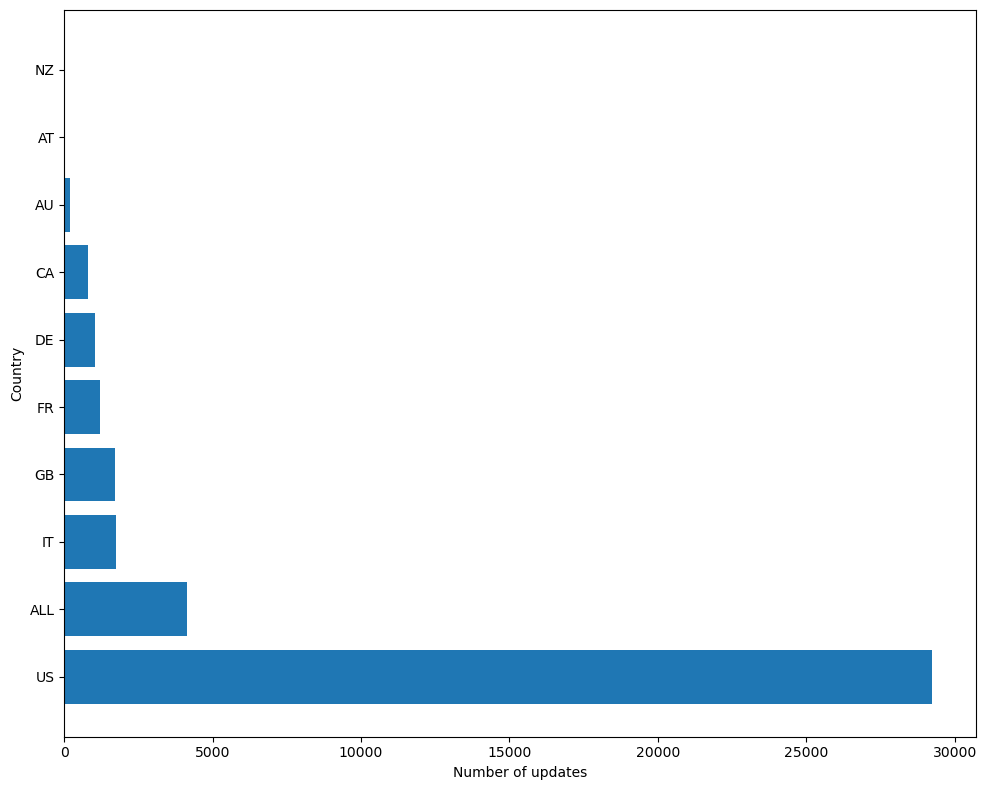

In [113]:
plt.figure(figsize=(10, 8))
country_updates = country_updates.sort_values("unique", ascending=False)
plt.barh(country_updates.index, country_updates["unique"])
plt.xlabel("Number of updates") 
plt.ylabel("Country")
plt.tight_layout()
plt.savefig(join(figures_path, "updates_per_country.png"), dpi=300)
plt.show()

In [114]:
unique_updates = df15.groupby(["Country", "file_year"])["Last Updated"]\
    .nunique().reset_index()
unique_updates.columns = ["Country", "Year", "Updates"]
unique_updates["Year"] = unique_updates["Year"].astype(str)

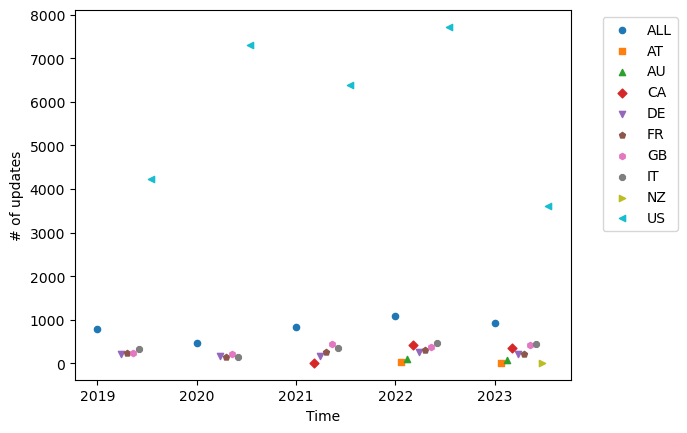

In [115]:
markers = ["o", "s", "^", "D", "v", "p", "h", "8", ">", "<"]
dodge = 0.06
unique_updates["Year"] = pd.to_numeric(unique_updates["Year"], errors="coerce")
for i, country in enumerate(unique_updates["Country"].unique()):
    country_df = unique_updates[unique_updates["Country"] == country]
    plt.scatter(
            country_df["Year"] + i * dodge, 
            country_df["Updates"], label=country, 
            marker=markers[i % len(markers)],  
            s=20)
plt.xlabel("Time")
plt.ylabel("# of updates")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.savefig(join(figures_path, "updates_per_country_over_time.png"), dpi=300)
plt.show()

## Political orientation

In [116]:
df15["Orientation"].describe()

count         16499
unique            6
top       Far Right
freq           7863
Name: Orientation, dtype: object

In [117]:
df15["Orientation"].value_counts()

Far Right         7863
Slightly Right    4610
Right             1766
Slightly Left     1399
Far Left           555
Left               306
Name: Orientation, dtype: int64

<Axes: xlabel='file_month'>

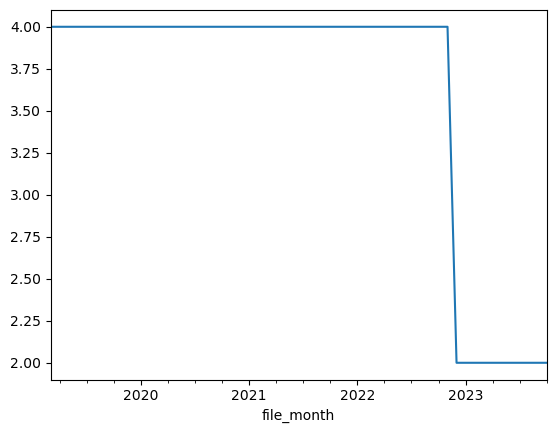

In [118]:
df15.groupby("file_month")["Orientation"]\
    .nunique()\
    .plot(kind="line")

In [120]:
orientation_counts_df = df15.groupby("file_year")["Orientation"]\
                        .value_counts(normalize=False)\
                        .to_frame()
orientation_counts_df.columns = ["Counts"]
orientation_counts_df = orientation_counts_df.reset_index()

orientation_counts_df

file_year     Orientation  Counts
0       2019       Far Right    1584
1       2019   Slightly Left     401
2       2019  Slightly Right     284
3       2019        Far Left     134
4       2020       Far Right    3154
5       2020  Slightly Right     331
6       2020   Slightly Left     322
7       2020        Far Left     122
8       2021       Far Right    1528
9       2021  Slightly Right    1301
10      2021   Slightly Left     363
11      2021        Far Left     122
12      2022  Slightly Right    2694
13      2022       Far Right    1597
14      2022   Slightly Left     313
15      2022        Far Left     177
16      2022           Right     126
17      2022            Left      47
18      2023           Right    1640
19      2023            Left     259

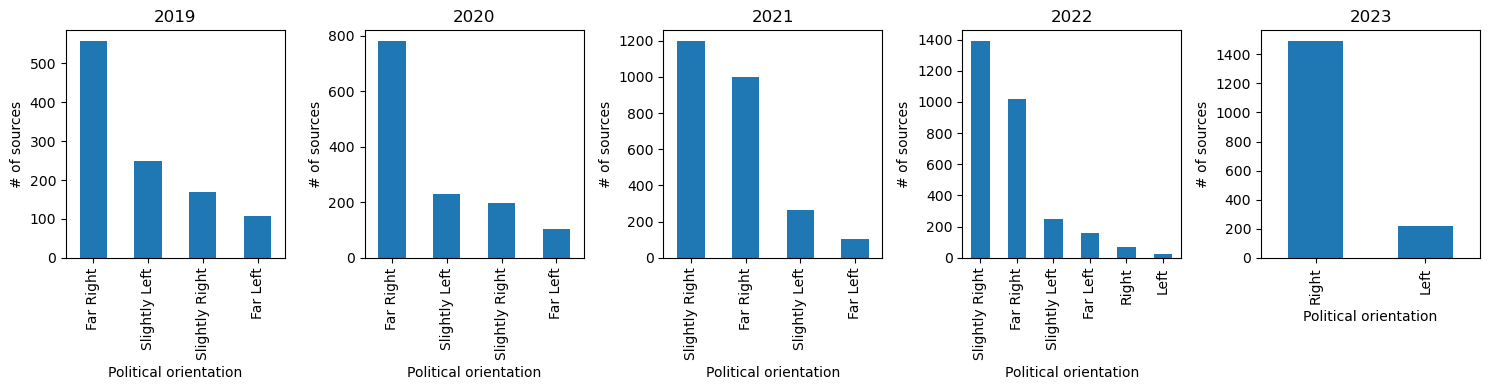

In [148]:
fig, axes = plt.subplots(nrows=1, 
                         ncols=len(df15['file_year']\
                                   .unique()), figsize=(15, 4))

for i, year in enumerate(df15['file_year'].unique()):
    df_subset = df15[df15['file_year'] == year]\
        .drop_duplicates(subset="Domain")
    df_subset['Orientation']\
        .value_counts(normalize=False)\
        .plot(kind='bar', stacked=True, ax=axes[i])
    
    axes[i].set_title(f'{year}')
    axes[i].set_xlabel("Political orientation")
    axes[i].set_ylabel("# of sources")

plt.tight_layout()
plt.show()

In [136]:
df15["Orientation_bi"] = df15["Orientation"].replace(
    {"Far Left": "Left", "Slightly Left": "Left", 
     "Slightly Right": "Right", 
     "Far Right": "Right"})
df15["Orientation_bi"].value_counts()

Right    14239
Left      2260
Name: Orientation_bi, dtype: int64

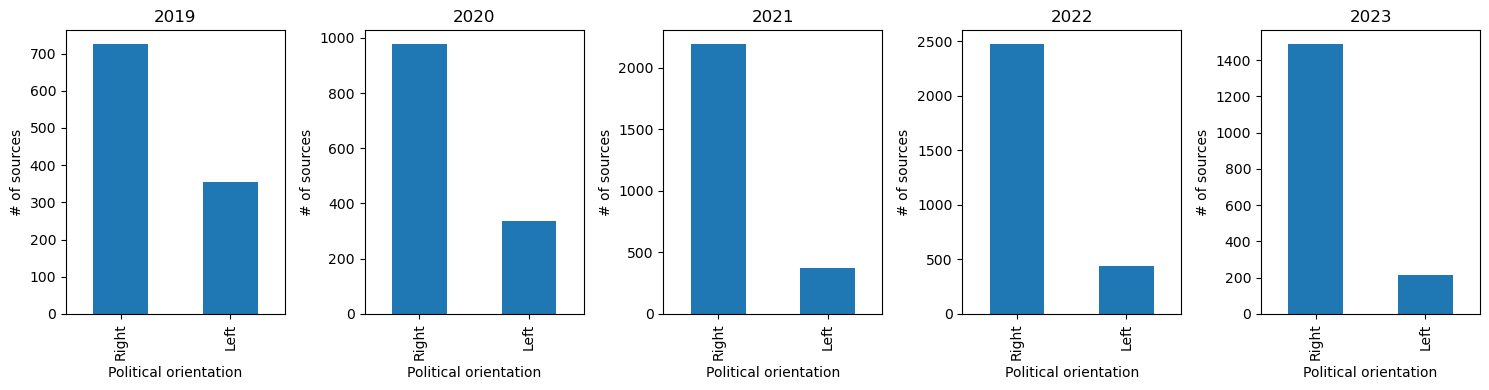

In [149]:
fig, axes = plt.subplots(nrows=1, 
                         ncols=len(df15['file_year']\
                                   .unique()), figsize=(15, 4))

for i, year in enumerate(df15['file_year'].unique()):
    df_subset = df15[df15['file_year'] == year]\
        .drop_duplicates(subset="Domain")
    df_subset['Orientation_bi']\
        .value_counts(normalize=False)\
        .plot(kind='bar', stacked=True, ax=axes[i])
    
    axes[i].set_title(f'{year}')
    axes[i].set_xlabel("Political orientation")
    axes[i].set_ylabel("# of sources")

plt.tight_layout()
plt.show()

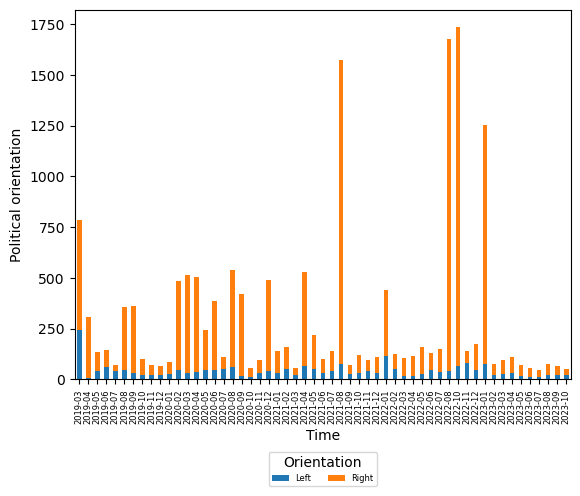

In [154]:
df15.drop_duplicates(subset=["UUID"])\
    .groupby("file_month")["Orientation_bi"]\
    .value_counts(normalize=False)\
    .unstack()\
    .plot(kind="bar", stacked=True)
plt.xlabel("Time")
plt.ylabel("Political orientation")
plt.xticks(fontsize=6)
plt.legend(title="Orientation", loc='lower center', 
           bbox_to_anchor=(0.5, -0.3), 
           ncol=3, fontsize=6)

MISC RUGGERO

In [212]:
df15.Topics.value_counts() 

Political news or commentary                                                                                          51967
Local News                                                                                                            18576
Health or medical information                                                                                         12705
Health or medical information,Political news or commentary,Conspiracy theories or hoaxes                              11181
Political news or commentary,Local News                                                                               11137
                                                                                                                      ...  
Health or medical information,General / Local News                                                                        1
Political news or commentary,Health or medical information,Sports and athletics,Entertainment,General / Local News        1
General 

## Popularity
There is no popularity measure in the dataset, I will try to come up with one by myself

In [51]:
websites_test=df_de_last.Domain.sample(10)

import requests

def get_similar_rank(url, api_key="594a88fb2d4e4c0983ea344bcac761d6"):
    # Set up the API endpoint and parameters
    endpoint = f'https://api.similarweb.com/v1/similar-rank/{url}/rank'
    params = {
        'api_key': api_key
    }

    # Send a GET request to the API endpoint with the parameters
    response = requests.get(endpoint, params=params)

    # Check if the request was successful
    if response.status_code == 200:
        # Extract the global rank from the response JSON
        data = response.json()
        global_rank = data['similar_rank']['rank']
        return global_rank
    else:
        print('Error:', response.status_code)

In [52]:
for website in websites_test:
    print(f"Website: {website}, Global Rank: {get_similar_rank(website)}")

Website: uncutnews.ch, Global Rank: 61030
Error: 404
Website: de.news-front.info, Global Rank: None
Website: tagesschau.de, Global Rank: 512
Website: ndr.de, Global Rank: 1978
Website: rollingstone.de, Global Rank: 21784
Website: swr3.de, Global Rank: 22765
Website: nationalgeographic.de, Global Rank: 25468
Website: snanews.de, Global Rank: 814752
Website: otz.de, Global Rank: 38822
Website: presseportal.de, Global Rank: 9492


Ok now we can order the websites by ranking after getting the ranking for every website

# Showing source to topic connections in relation to their rating

In [53]:
# check if the csv with the rankings was already cached, else make it
if os.path.isfile("df_de_with_rankings.csv"):
    df_de_last=pd.read_csv("df_de_with_rankings.csv")
else:
    df_de_last["similar_rank"]=df_de_last.Domain.apply(get_similar_rank)
    df_de_last["similar_rank"].fillna(1000000000000,inplace=True) # fill na with a big number to fix missing rankings
    df_de_last.to_csv("df_de_with_rankings.csv",index=False)



In [54]:
# make a networkx graph source-topic
import networkx as nx


# create an empty graph
G = nx.Graph()

# making every topics a string
df_de_last.Topics=df_de_last.Topics.astype(str)

# iterate over every row of df_de and extract the topics as nodes to connect to
for index, row in df_de_last.iterrows():
    if row['Topics'] == "nan":
        continue
    topics = row['Topics'].split(',')
    for topic in topics:
        # add an edge between the source and the topic
        # the edge should have an attribute rating with the value of the score
        G.add_edge(row['Domain'], topic, type='source-topic', score=row['Score'])
        # make the topic node a 'topic' node
        G.nodes[topic]['type'] = 'topic'
        G.nodes[row['Domain']]['type'] = 'source'
        G.nodes[row['Domain']]['rating'] = row['Rating']
        G.nodes[row['Domain']]['ranking'] = row['similar_rank']
        G.nodes[row['Domain']]['score'] = row['Score']
        G.nodes[row['Domain']]['orientation'] = row['Orientation']

|    | Topic                         |   avg_score |   Source count |
|---:|:------------------------------|------------:|---------------:|
|  0 | Local News                    |     92.8125 |             24 |
|  1 | General News                  |     92.3846 |             26 |
|  2 | Political news or commentary  |     72.6604 |            267 |
|  3 | Conspiracy theories or hoaxes |     19.2537 |             69 |
|  4 | General / Local News          |     86.75   |             10 |
|  5 | Business or Personal Finance  |     86.0455 |             13 |
|  6 | Parenting                     |     85      |              2 |
|  7 | Religion                      |     95      |              1 |
|  8 | Science                       |     83.75   |              4 |
|  9 | Technology                    |     89.6429 |              7 |
| 10 | Health or medical information |     53      |             65 |
| 11 | Lifestyle                     |     75.1875 |              8 |
| 12 | Fashion                       |     78.75   |              2 |
| 13 | Viral content                 |     78.25   |              6 |
| 14 | Celebrity news                |     78.5357 |             14 |
| 15 | Entertainment                 |     78.2105 |             19 |
| 16 | Sports and athletics          |     94.375  |              4 |

['achgut.com', 'pravda-tv.com', 'pi-news.net', 'anti-spiegel.ru', 'uncutnews.ch']
['zentrum-der-gesundheit.de', 'pravda-tv.com', 'uncutnews.ch', 'report24.news', 'kla.tv']


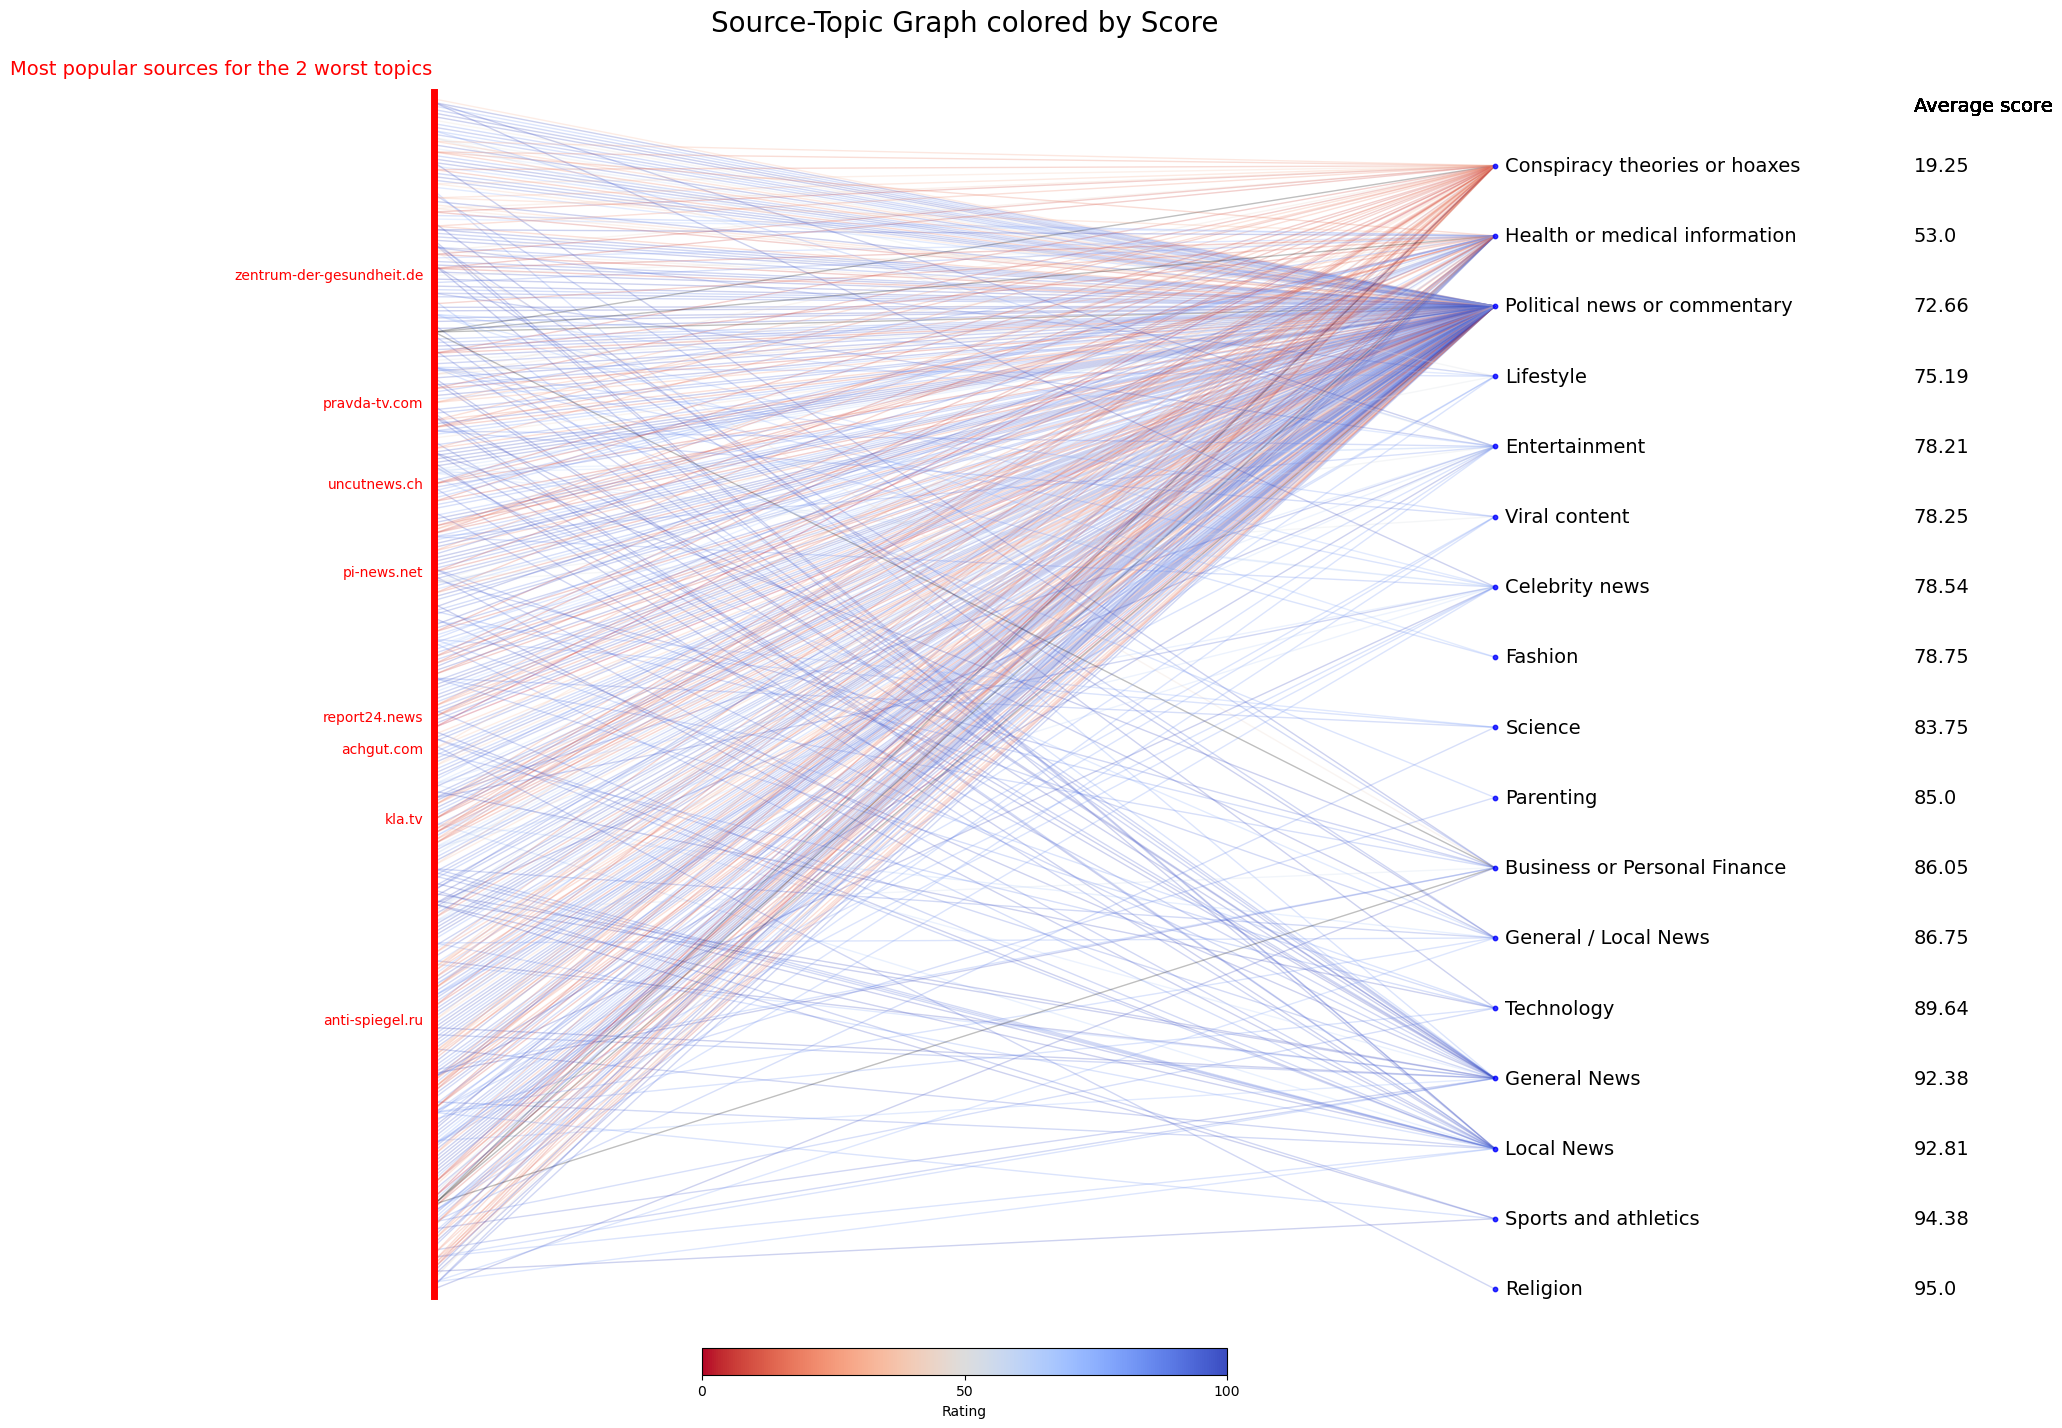

In [55]:
# lets graph this
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt

# first we need to get the positions of the nodes, sources on the left and topics on the right
non_source_nodes = [v for v in G.nodes() if G.nodes[v]['type']=='topic']
num_non_source_nodes = len(non_source_nodes)
pos={}
len_sources = len(G.nodes())-num_non_source_nodes
# order the source nodes randomly
random_sources=[node for node in G.nodes() if G.nodes[node]['type']=='source']
random.shuffle(random_sources)

for i,node in enumerate(random_sources):
    if G.nodes[node]['type']=='source':
        pos[node]=(-1,len(G.nodes())/len_sources*i*1.2)
        

# initiate mrk table Topic | avg_score 
table = pd.DataFrame(columns=["Topic","avg_score","Source count"])

# order the topic nodes by the average score of the edges
# first get the average score of the edges
for node in non_source_nodes:
    G.nodes[node]['avg_score'] = np.nanmean([edge[2]['score'] for edge in G.edges(node,data=True)])
    # adding row to markdown table topic | avg_score
    G.nodes[node]['count'] = len([edge[2]['score'] for edge in G.edges(node,data=True)])
    table = pd.concat([table,pd.DataFrame([[node,G.nodes[node]['avg_score'],G.nodes[node]["count"]]],columns=["Topic","avg_score","Source count"])],ignore_index=True)
    
# print the table
display((Markdown(table.to_markdown())))
    

# order the nodes by the average score
non_source_nodes = [node for score,node in sorted([(G.nodes[node]['avg_score'],node) for node in non_source_nodes],reverse=True)]

for i,node in enumerate(non_source_nodes):
    pos[node]=(1,len(G.nodes())/num_non_source_nodes*i*1.2)
        



# lets get the edges and their ratings
# the color of the edge will be the rating

# make a color map that goes from blue to red but reverse it so that red is the lowest rating
cmap = plt.cm.coolwarm.reversed()
 
# get the ratings
ratings = [edge[2]['score'] for edge in G.edges(data=True)]


#big graph
plt.figure(figsize=(10,20))

# plotting the edges with the ratings as colors, using the coolwarm colormap
nx.draw_networkx_edges(G,pos,edge_color=ratings,edge_cmap=cmap,edge_vmin=min(ratings),edge_vmax=max(ratings), alpha=0.25)



# Add a straight line at x=-1 on the left
plt.axvline(x=-1, color='r', alpha=1,ymin=0.04,ymax=0.96, linewidth=5,linestyle='-')
# plot topics
nx.draw_networkx_nodes(G,pos,nodelist=[v for v in G.nodes() if G.nodes[v]['type']=='topic'],node_size=10,node_color='b',alpha=0.8)

# adding labels on the right for the topics

# bump the networkx labels more right by 2 pixels
for _,t in nx.draw_networkx_labels(G,pos,labels={v:v for v in G.nodes() if G.nodes[v]['type']=='topic'},font_size=14, horizontalalignment='left').items():
    t.set_rotation(0)
    t.set_ha('left')
    
    t.set_x(t.get_position()[0]+0.02)
    
    # right to that position add a label with the average score
    
    # get furthermost left position of the node
    
    # assuming you have a text object called t
    
    pos_node = t.get_position()
    pos_node=(pos_node[0]+0.75,pos_node[1])
    node = t.get_text()
    node= G.nodes[node]
    plt.text(pos_node[0]+0.02,pos_node[1],str(round(node['avg_score'],2)),horizontalalignment='left',verticalalignment='center',transform=plt.gca().transData, fontsize=14)
    
    # print on top that this is the average score
    plt.text(pos_node[0]+0.02,len_sources*1.25,"Average score",horizontalalignment='left',verticalalignment='center',transform=plt.gca().transData,fontsize=14)


worse_2_non_sources = [node for score,node in sorted([(G.nodes[node]['avg_score'],node) for node in non_source_nodes],reverse=False)[:2]]

# get top 5 sources by similarweb for each of the 2 worst topics
bad_sources = []
for non_source in worse_2_non_sources:
    bad_sources_nodes=[edge[1] for edge in G.edges(non_source,data=True)]
    # keep only "N" rated nodes
    bad_sources_nodes = [node for node in bad_sources_nodes if G.nodes[node]['rating']=="N"]
    # sort them by similarweb rank
    bad_sources_nodes = sorted(bad_sources_nodes,key=lambda x:G.nodes[x]['ranking'])[:5]
    print(bad_sources_nodes)
    bad_sources.extend(bad_sources_nodes)
    
# add a label for the top 5 sources by ranking, bump it left by 2 pixels
for _,t in nx.draw_networkx_labels(G,pos,labels={v:v for v in bad_sources},font_size=10, horizontalalignment='left', font_color="r").items():
    t.set_rotation(0)
    t.set_ha('right')
    t.set_x(t.get_position()[0]-0.02)

# # get good sources
# good_sources = [v for v in G.nodes() if G.nodes[v]['type']=='source' and G.nodes[v]['rating']=="T"]
# # add a label to the top 5 sources by ranking, bump it left by 2 pixels
# for _,t in nx.draw_networkx_labels(G,pos,labels={v:v for v in sorted(good_sources,key=lambda x:G.nodes[x]['ranking'])[:5]},font_size=10, horizontalalignment='left', font_color="b").items():
#     t.set_rotation(0)
#     t.set_ha('right')
#     t.set_x(t.get_position()[0]-0.02)
    
    
# # get bad sources
# bad_sources = [v for v in G.nodes() if G.nodes[v]['type']=='source' and G.nodes[v]['rating']=="N"]

# add a label to the top 5 bad sources by ranking, bump it left by 2 pixels
# for _,t in nx.draw_networkx_labels(G,pos,labels={v:v for v in sorted(bad_sources,key=lambda x:G.nodes[x]['ranking'])[:5]},font_size=10, horizontalalignment='left', font_color="r").items():
#     t.set_rotation(0)
#     t.set_ha('right')
#     t.set_x(t.get_position()[0]-0.02)
    
    
    



plt.axis('off')
# adding the cmap as a colorbar, at the bottom
cbar=plt.colorbar(mpl.cm.ScalarMappable(cmap=cmap),label='Rating',orientation='horizontal',shrink=0.3,pad=0)
cbar.set_ticks([0,0.5,1])
cbar.set_ticklabels(['0',"50",'100'])

plt.margins(x=0.25, y=0)
plt.subplots_adjust(right=1.75, left=0)
plt.title("Source-Topic Graph colored by Score", fontsize=20)
ymax=plt.ylim()[1]

plt.text(-1.80,ymax*0.95+10, "Most popular sources for the 2 worst topics", fontsize=14, color="r")

# # add a legend on the top left saying "Top 5 Good Sources" and "Top 5 Bad Sources"
# plt.text(-1.5,plt.ylim()[1]*0.95+10, "Top 5 Good Sources", fontsize=14, color="b")
# plt.text(-1.5,plt.ylim()[1]*0.95, "Top 5 Bad Sources", fontsize=14, color="r")
# saving graph in hq
plt.savefig('source_topic_graph.png', dpi=300, bbox_inches='tight')

plt.show()


In [56]:
# make a df with the sources, their attributes and the topics they are connected to
source_df = pd.DataFrame(columns=["Source","Rating","Score","Ranking","Topics"])
source_df["Source"] = [v for v in G.nodes() if G.nodes[v]['type']=='source']
source_df["Score"] = [G.nodes[v]['score'] for v in G.nodes() if G.nodes[v]['type']=='source']
source_df["Rating"] = [G.nodes[v]['rating'] for v in G.nodes() if G.nodes[v]['type']=='source']
source_df["Ranking"] = [G.nodes[v]['ranking'] for v in G.nodes() if G.nodes[v]['type']=='source']
source_df["Topics"] = [[edge[1] for edge in G.edges(v) if G.nodes[edge[1]]['type']=='topic'] for v in G.nodes() if G.nodes[v]['type']=='source']

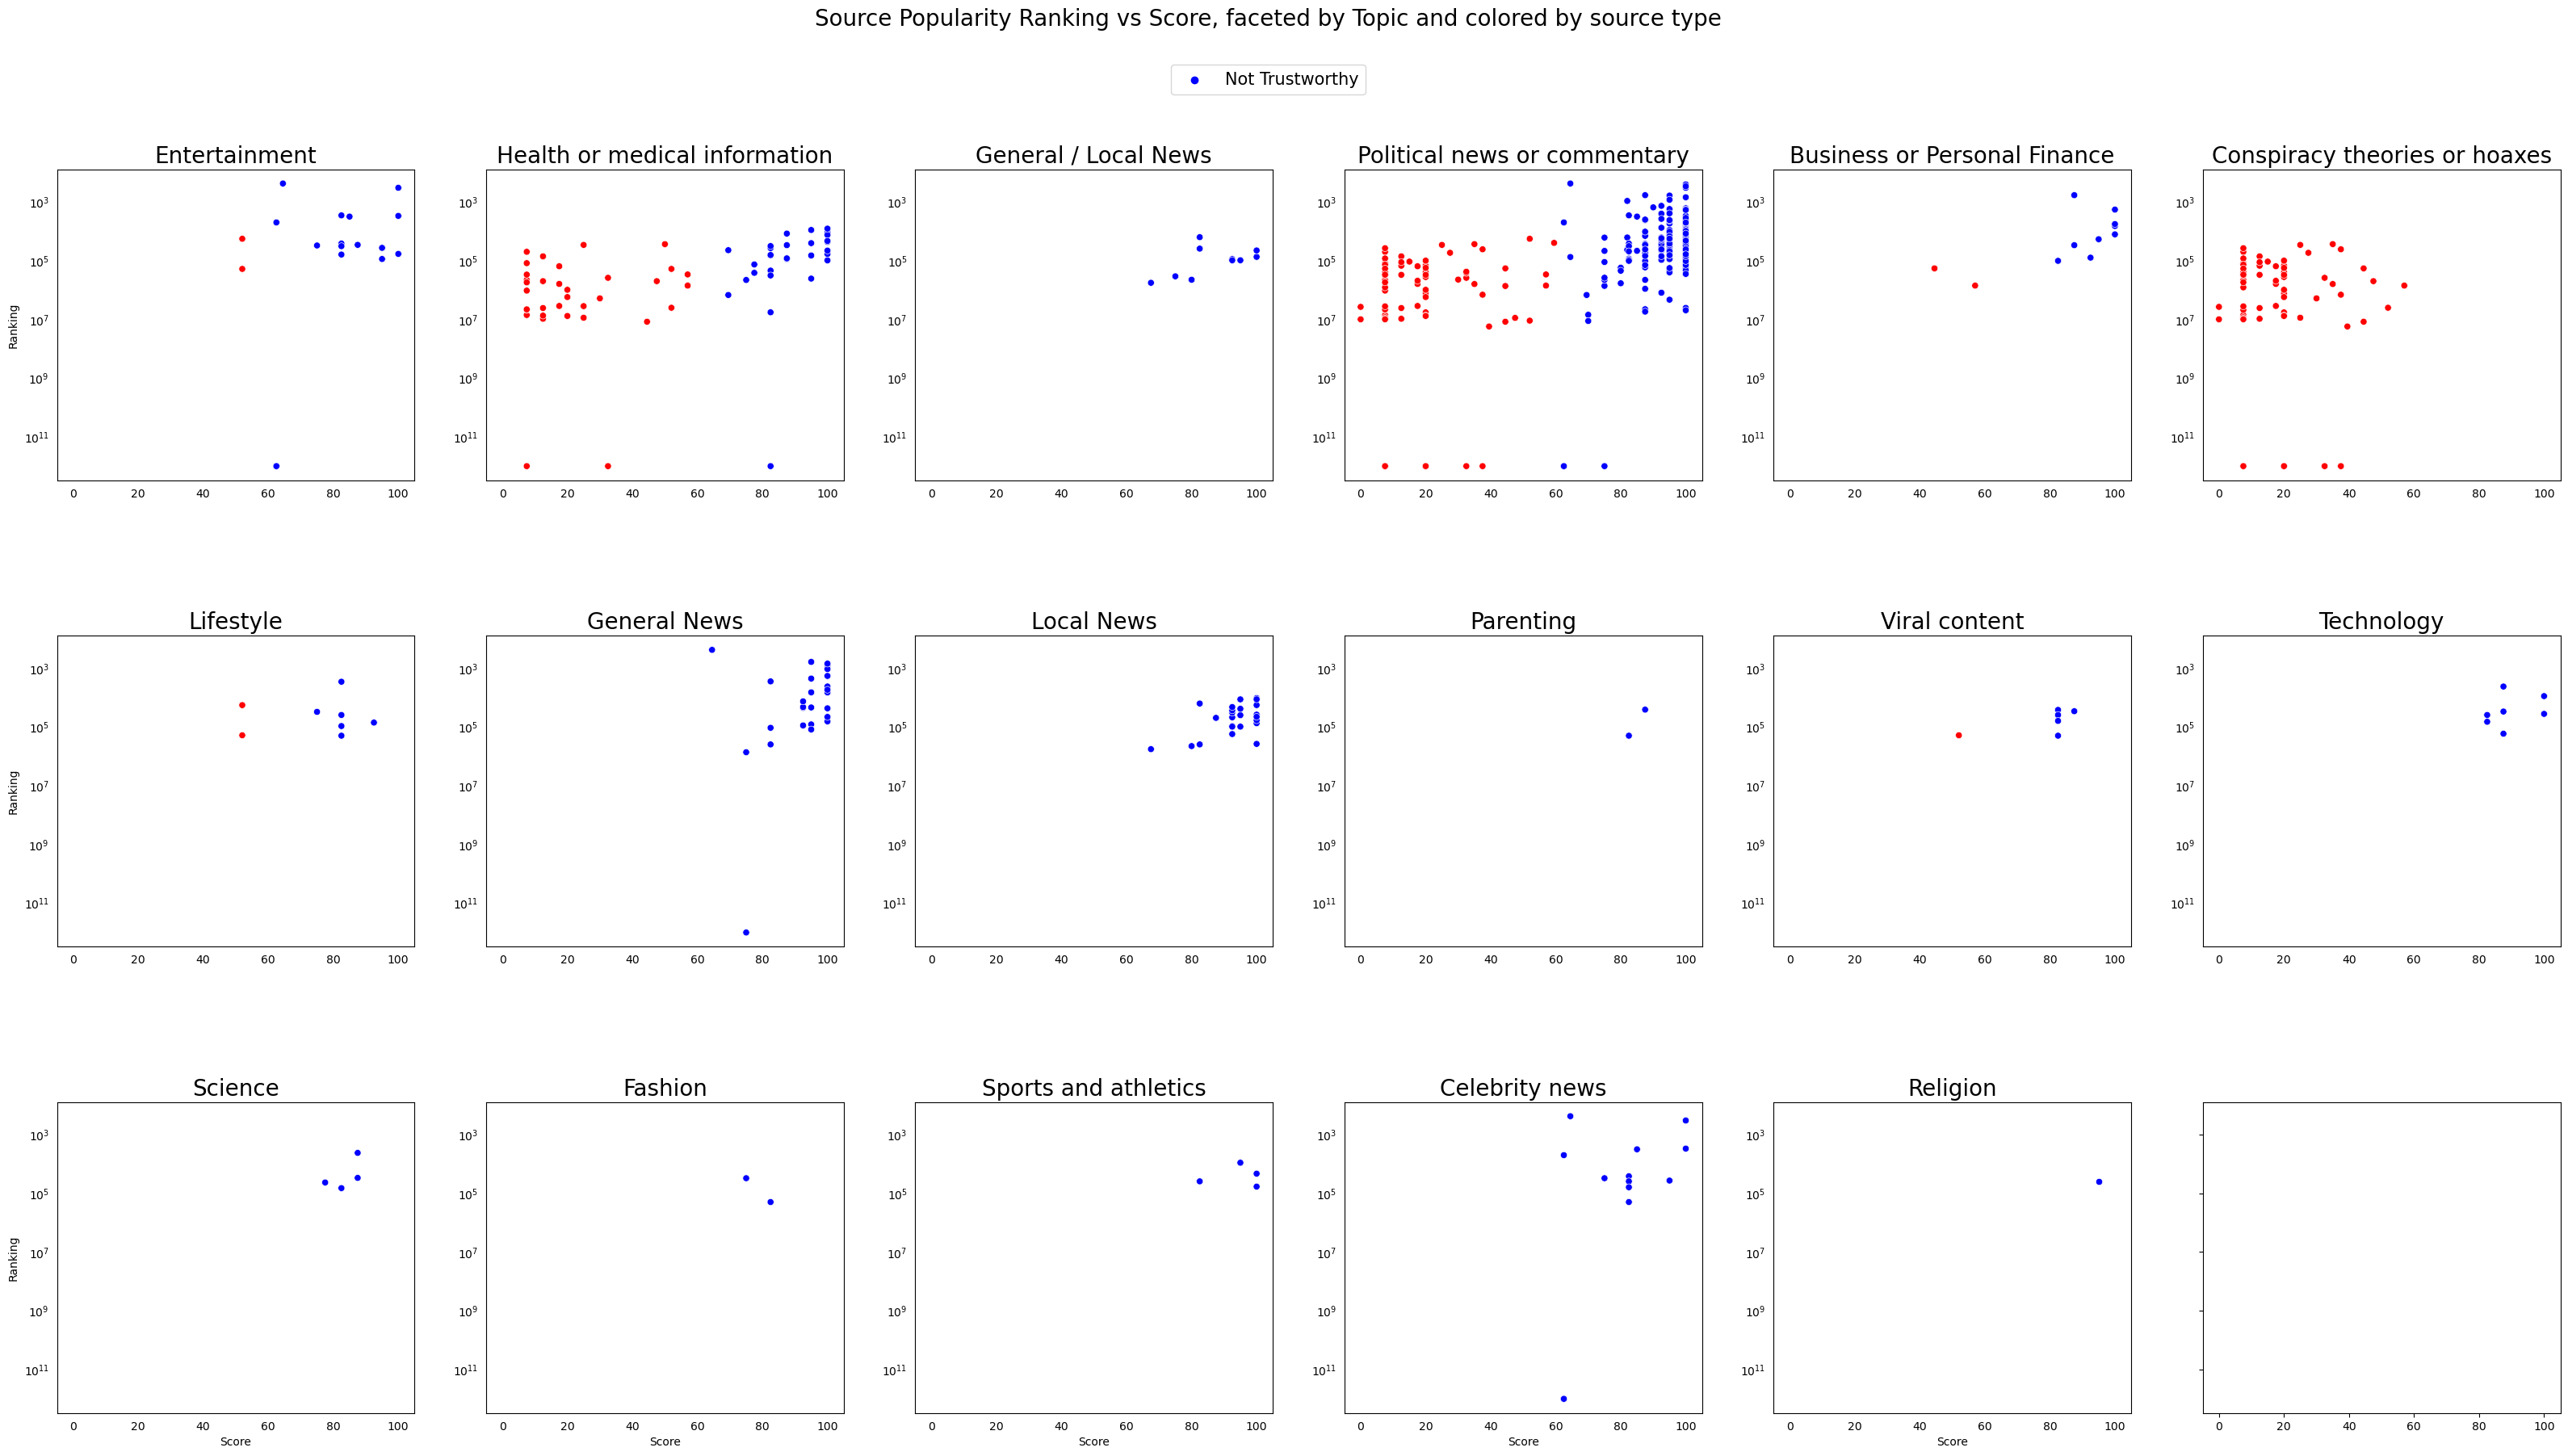

In [57]:
# faceted plot log ranking by score, facted by topic
import seaborn as sns
import matplotlib
topics=set([topic for sublist in source_df["Topics"] for topic in sublist])
lent= len(topics)
fig, axs = plt.subplots(3,6,figsize=(40,20),sharey=True, sharex=True,)
# make it show the ticks labels everywhere despite sharing it

# make every subplot taller
fig.subplots_adjust(hspace=0.5)
for topic in topics:
    topic_df = source_df[source_df["Topics"].apply(lambda x: topic in x)]
    # get the axes for this topic
    ax=axs.flatten()[list(topics).index(topic)]
    
    # dictionary for hues T is blue, N is red
    hues={"T":"b","N":"r","P":"w"}

    # plot the scatterplot, use the hues dict for the colot
    sns.scatterplot(data=topic_df, x="Score", y="Ranking", hue="Rating", palette=hues, ax=ax)
    ax.set_title(topic)
    ax.set_yscale('log')
    ax.invert_yaxis()
    ax.tick_params(axis="both", which="both", bottom=False, top=False, labelbottom=True, left=False, right=False, labelleft=True)
    # turn off legend
    handles, labels = ax.get_legend_handles_labels()
    ax.get_legend().remove()
    
    # make subplot title bigger
    ax.title.set_size(20)

fig.suptitle("Source Popularity Ranking vs Score, faceted by Topic and colored by source type", fontsize=20)
# make a global legend, with the color of the Rating
fig.legend(labels=["Not Trustworthy","Trustworthy"], loc='upper center', ncol=2, fontsize=15, handles=handles, bbox_to_anchor=(0.5, 0.95))

# substitute T and N with Trastworthy and Not Trustworthy in the legneds

plt.show()


In [58]:
# group by topic and get the top 5 sources by ranking for each rating
for topic in topics:
    topic_df = source_df[source_df["Topics"].apply(lambda x: topic in x)]
    topic_df = topic_df.sort_values("Ranking")[["Source","Ranking","Score","Rating"]]
    top_5_pos=topic_df[topic_df["Rating"]=="T"].head(5)
    top_5_neg=topic_df[topic_df["Rating"]=="N"].head(5)
    display(Markdown("### Most popular positive sources for Topic: "+topic))
    display(Markdown(top_5_pos.to_markdown()))
    display(Markdown("### Most popular negative sources for Topic: "+topic))
    display(Markdown(top_5_neg.to_markdown()))
    
    

### Most popular positive sources for Topic: Entertainment

|     | Source       |   Ranking |   Score | Rating   |
|----:|:-------------|----------:|--------:|:---------|
|  53 | bild.de      |       235 |    64.5 | T        |
| 212 | gmx.net      |       329 |   100   | T        |
| 329 | vice.com     |      2864 |    82.5 | T        |
|  92 | tz.de        |      2983 |   100   | T        |
| 300 | derwesten.de |      3151 |    85   | T        |

### Most popular negative sources for Topic: Entertainment

|     | Source       |   Ranking |   Score | Rating   |
|----:|:-------------|----------:|--------:|:---------|
| 227 | servustv.com |     17954 |      52 | N        |
| 225 | heftig.de    |    191154 |      52 | N        |

### Most popular positive sources for Topic: Health or medical information

|     | Source               |   Ranking |   Score | Rating   |
|----:|:---------------------|----------:|--------:|:---------|
| 222 | utopia.de            |      8106 |   100   | T        |
|  83 | presseportal.de      |      9019 |    95   | T        |
| 147 | apotheken-umschau.de |     10897 |   100   | T        |
| 125 | netdoktor.de         |     11950 |    87.5 | T        |
| 151 | spektrum.de          |     13261 |   100   | T        |

### Most popular negative sources for Topic: Health or medical information

|     | Source                    |   Ranking |   Score | Rating   |
|----:|:--------------------------|----------:|--------:|:---------|
| 101 | zentrum-der-gesundheit.de |     27395 |    50   | N        |
| 277 | pravda-tv.com             |     29054 |    25   | N        |
|  88 | uncutnews.ch              |     49898 |     7.5 | N        |
| 238 | report24.news             |     71212 |    12.5 | N        |
|  46 | kla.tv                    |    121638 |     7.5 | N        |

### Most popular positive sources for Topic: General / Local News

|     | Source               |   Ranking |   Score | Rating   |
|----:|:---------------------|----------:|--------:|:---------|
| 231 | tt.com               |     15838 |    82.5 | T        |
| 137 | gentside.de          |     38914 |    82.5 | T        |
| 254 | bw24.de              |     44909 |   100   | T        |
|  50 | siegener-zeitung.de  |     74207 |   100   | T        |
|  21 | esslinger-zeitung.de |     88376 |    92.5 | T        |

### Most popular negative sources for Topic: General / Local News

| Source   | Ranking   | Score   | Rating   |
|----------|-----------|---------|----------|

### Most popular positive sources for Topic: Political news or commentary

|     | Source      |   Ranking |   Score | Rating   |
|----:|:------------|----------:|--------:|:---------|
|  53 | bild.de     |       235 |    64.5 | T        |
| 199 | t-online.de |       253 |   100   | T        |
| 214 | web.de      |       292 |   100   | T        |
| 212 | gmx.net     |       329 |   100   | T        |
|  27 | n-tv.de     |       587 |    87.5 | T        |

### Most popular negative sources for Topic: Political news or commentary

|     | Source          |   Ranking |   Score | Rating   |
|----:|:----------------|----------:|--------:|:---------|
| 227 | servustv.com    |     17954 |    52   | N        |
| 213 | reitschuster.de |     24803 |    59.5 | N        |
|  90 | achgut.com      |     27310 |    35   | N        |
| 277 | pravda-tv.com   |     29054 |    25   | N        |
|  91 | pi-news.net     |     37574 |     7.5 | N        |

### Most popular positive sources for Topic: Business or Personal Finance

|     | Source             |   Ranking |   Score | Rating   |
|----:|:-------------------|----------:|--------:|:---------|
|  27 | n-tv.de            |       587 |    87.5 | T        |
| 179 | faz.net            |      1819 |   100   | T        |
| 140 | handelsblatt.com   |      5660 |   100   | T        |
| 106 | businessinsider.de |      6593 |   100   | T        |
| 258 | deraktionaer.de    |     12692 |   100   | T        |

### Most popular negative sources for Topic: Business or Personal Finance

|     | Source        |   Ranking |   Score | Rating   |
|----:|:--------------|----------:|--------:|:---------|
|  47 | mmnews.de     |    183166 |    44.5 | N        |
| 107 | neopresse.com |    706797 |    57   | N        |

### Most popular positive sources for Topic: Conspiracy theories or hoaxes

| Source   | Ranking   | Score   | Rating   |
|----------|-----------|---------|----------|

### Most popular negative sources for Topic: Conspiracy theories or hoaxes

|     | Source          |   Ranking |   Score | Rating   |
|----:|:----------------|----------:|--------:|:---------|
|  90 | achgut.com      |     27310 |    35   | N        |
| 277 | pravda-tv.com   |     29054 |    25   | N        |
|  91 | pi-news.net     |     37574 |     7.5 | N        |
| 275 | anti-spiegel.ru |     40976 |    37.5 | N        |
|  88 | uncutnews.ch    |     49898 |     7.5 | N        |

### Most popular positive sources for Topic: Lifestyle

|     | Source        |   Ranking |   Score | Rating   |
|----:|:--------------|----------:|--------:|:---------|
| 329 | vice.com      |      2864 |    82.5 | T        |
| 250 | vogue.de      |     30423 |    75   | T        |
| 137 | gentside.de   |     38914 |    82.5 | T        |
| 301 | jetzt.de      |     70551 |    92.5 | T        |
| 123 | tip-berlin.de |     92708 |    82.5 | T        |

### Most popular negative sources for Topic: Lifestyle

|     | Source       |   Ranking |   Score | Rating   |
|----:|:-------------|----------:|--------:|:---------|
| 227 | servustv.com |     17954 |      52 | N        |
| 225 | heftig.de    |    191154 |      52 | N        |

### Most popular positive sources for Topic: General News

|     | Source        |   Ranking |   Score | Rating   |
|----:|:--------------|----------:|--------:|:---------|
|  53 | bild.de       |       235 |    64.5 | T        |
| 176 | tagesschau.de |       605 |    95   | T        |
| 190 | focus.de      |       692 |   100   | T        |
|  39 | spiegel.de    |       805 |   100   | T        |
| 172 | zdf.de        |      1059 |   100   | T        |

### Most popular negative sources for Topic: General News

| Source   | Ranking   | Score   | Rating   |
|----------|-----------|---------|----------|

### Most popular positive sources for Topic: Local News

|     | Source                     |   Ranking |   Score | Rating   |
|----:|:---------------------------|----------:|--------:|:---------|
|  71 | ruhrnachrichten.de         |     10345 |   100   | T        |
| 331 | stuttgarter-nachrichten.de |     11417 |   100   | T        |
| 122 | abendblatt.de              |     11419 |    95   | T        |
| 231 | tt.com                     |     15838 |    82.5 | T        |
| 168 | freiepresse.de             |     17873 |   100   | T        |

### Most popular negative sources for Topic: Local News

| Source   | Ranking   | Score   | Rating   |
|----------|-----------|---------|----------|

### Most popular positive sources for Topic: Parenting

|    | Source    |   Ranking |   Score | Rating   |
|---:|:----------|----------:|--------:|:---------|
| 26 | eltern.de |     25555 |    87.5 | T        |
| 43 | miss.at   |    197521 |    82.5 | T        |

### Most popular negative sources for Topic: Parenting

| Source   | Ranking   | Score   | Rating   |
|----------|-----------|---------|----------|

### Most popular positive sources for Topic: Viral content

|     | Source          |   Ranking |   Score | Rating   |
|----:|:----------------|----------:|--------:|:---------|
| 136 | rollingstone.de |     26105 |    82.5 | T        |
| 259 | buzzfeed.de     |     28943 |    87.5 | T        |
| 137 | gentside.de     |     38914 |    82.5 | T        |
| 260 | faktastisch.de  |     61839 |    82.5 | T        |
|  43 | miss.at         |    197521 |    82.5 | T        |

### Most popular negative sources for Topic: Viral content

|     | Source    |   Ranking |   Score | Rating   |
|----:|:----------|----------:|--------:|:---------|
| 225 | heftig.de |    191154 |      52 | N        |

### Most popular positive sources for Topic: Technology

|     | Source        |   Ranking |   Score | Rating   |
|----:|:--------------|----------:|--------:|:---------|
|  70 | heise.de      |      4171 |    87.5 | T        |
| 164 | golem.de      |      8859 |   100   | T        |
|  33 | futurezone.at |     29701 |    87.5 | T        |
| 116 | t3n.de        |     35680 |   100   | T        |
| 137 | gentside.de   |     38914 |    82.5 | T        |

### Most popular negative sources for Topic: Technology

| Source   | Ranking   | Score   | Rating   |
|----------|-----------|---------|----------|

### Most popular positive sources for Topic: Science

|     | Source                |   Ranking |   Score | Rating   |
|----:|:----------------------|----------:|--------:|:---------|
|  70 | heise.de              |      4171 |    87.5 | T        |
|  33 | futurezone.at         |     29701 |    87.5 | T        |
| 257 | nationalgeographic.de |     42587 |    77.5 | T        |
|  63 | scinexx.de            |     66226 |    82.5 | T        |

### Most popular negative sources for Topic: Science

| Source   | Ranking   | Score   | Rating   |
|----------|-----------|---------|----------|

### Most popular positive sources for Topic: Fashion

|     | Source   |   Ranking |   Score | Rating   |
|----:|:---------|----------:|--------:|:---------|
| 250 | vogue.de |     30423 |    75   | T        |
|  43 | miss.at  |    197521 |    82.5 | T        |

### Most popular negative sources for Topic: Fashion

| Source   | Ranking   | Score   | Rating   |
|----------|-----------|---------|----------|

### Most popular positive sources for Topic: Sports and athletics

|     | Source            |   Ranking |   Score | Rating   |
|----:|:------------------|----------:|--------:|:---------|
|  83 | presseportal.de   |      9019 |    95   | T        |
| 180 | fitforfun.de      |     21271 |   100   | T        |
| 137 | gentside.de       |     38914 |    82.5 | T        |
|  98 | fuldaerzeitung.de |     58780 |   100   | T        |

### Most popular negative sources for Topic: Sports and athletics

| Source   | Ranking   | Score   | Rating   |
|----------|-----------|---------|----------|

### Most popular positive sources for Topic: Celebrity news

|     | Source       |   Ranking |   Score | Rating   |
|----:|:-------------|----------:|--------:|:---------|
|  53 | bild.de      |       235 |    64.5 | T        |
| 212 | gmx.net      |       329 |   100   | T        |
|  92 | tz.de        |      2983 |   100   | T        |
| 300 | derwesten.de |      3151 |    85   | T        |
| 236 | oe24.at      |      4983 |    62.5 | T        |

### Most popular negative sources for Topic: Celebrity news

| Source   | Ranking   | Score   | Rating   |
|----------|-----------|---------|----------|

### Most popular positive sources for Topic: Religion

|    | Source        |   Ranking |   Score | Rating   |
|---:|:--------------|----------:|--------:|:---------|
| 32 | katholisch.de |     39391 |      95 | T        |

### Most popular negative sources for Topic: Religion

| Source   | Ranking   | Score   | Rating   |
|----------|-----------|---------|----------|

# Orientation

Let's see what does the political orientation tells us

In [59]:
df_de.Orientation.value_counts()

Orientation
Far Right         204
Slightly Left     194
Slightly Right    118
Right              57
Far Left           54
Left               14
Name: count, dtype: int64

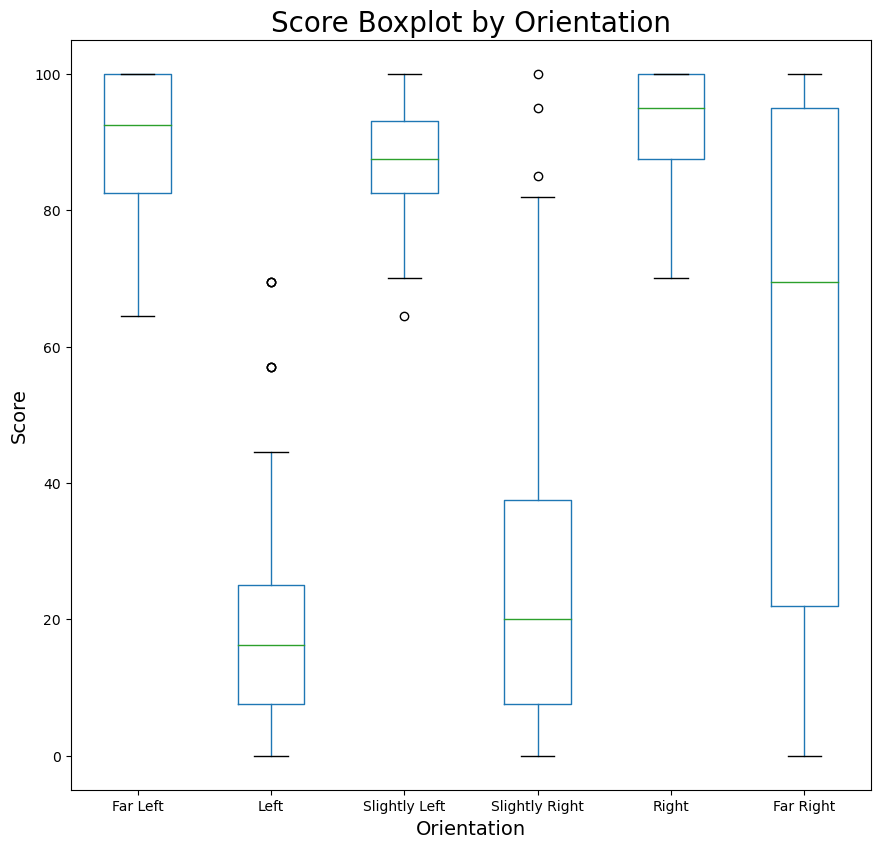

In [60]:
# score boxplot by orientation
df_de.boxplot(column="Score",by="Orientation",figsize=(10,10))

plt.title("Score Boxplot by Orientation", fontsize=20)
plt.suptitle("")
plt.xlabel("Orientation", fontsize=14)
plt.xticks([1,2,3,4,5,6],['Far Left','Left','Slightly Left','Slightly Right','Right','Far Right'],rotation=0)
plt.ylabel("Score", fontsize=14)
# remove grid
plt.grid(False)


Let's see a violinplot to see the distribution as well

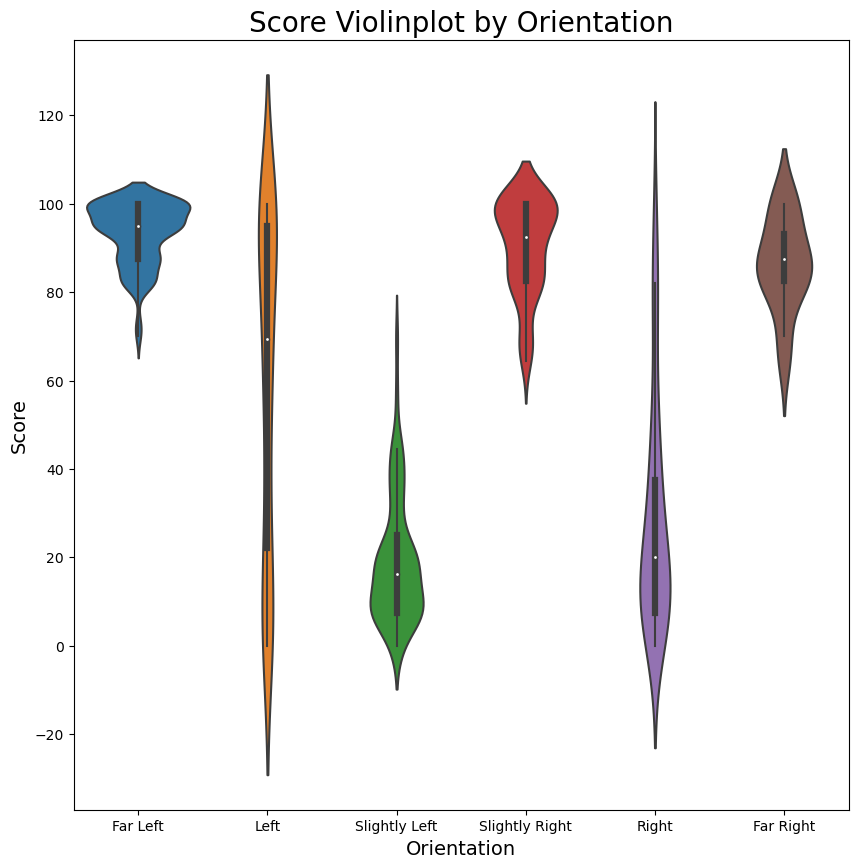

In [61]:
# make a violinpolt of the score by orientation
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10))
sns.violinplot(x="Orientation", y="Score", data=df_de, ax=ax)
ax.set_title("Score Violinplot by Orientation", fontsize=20)
ax.set_xlabel("Orientation", fontsize=14)
ax.set_xticklabels(['Far Left','Left','Slightly Left','Slightly Right','Right','Far Right'],rotation=0)
ax.set_ylabel("Score", fontsize=14)
plt.show()

C:\Users\rmlaz\AppData\Local\Temp\ipykernel_17472\3213705409.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_de['Orientation'] = df_de['Orientation'].replace({'Far Left':-1,'Slightly Left':-0.25,'Left':-0.5,'Center':0,'Right':0.5,'Slightly Right':0.25,'Far Right':1})


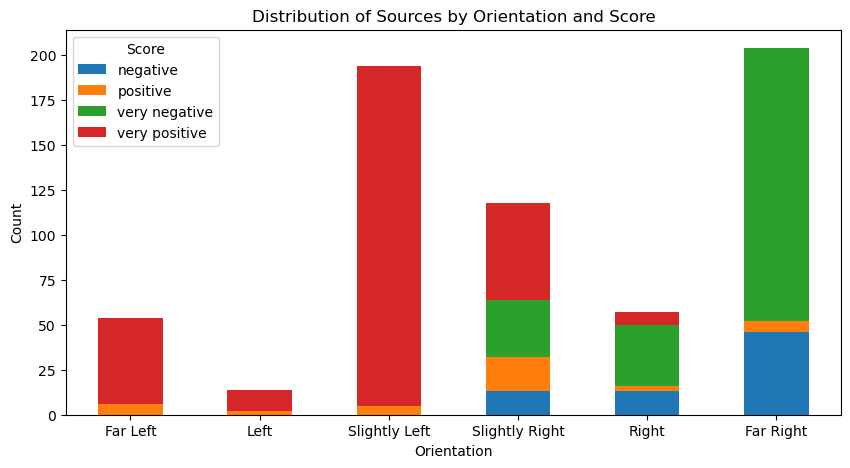

In [62]:


# make Orientation be a scale that goes from Far Left to Far right
df_de['Orientation'] = df_de['Orientation'].replace({'Far Left':-1,'Slightly Left':-0.25,'Left':-0.5,'Center':0,'Right':0.5,'Slightly Right':0.25,'Far Right':1})
# plot counts per orientation category, colored by score (group by score_cat), for the first date of the dataset
df_de.groupby(['Orientation','score_cat']).size().unstack().plot(kind='bar',stacked=True,figsize=(10,5))

# put the labels on the bars
plt.xticks([0,1,2,3,4,5],['Far Left','Left','Slightly Left','Slightly Right','Right','Far Right'],rotation=0)
plt.ylabel("Count")
plt.title("Distribution of Sources by Orientation and Score")

# set the legend title
plt.legend(title="Score")


plt.show()

Those plots are misleading, because they treat the aggregate data over the years, repeating the same sources/spanning different categorization methods. Let's see how the categorization changed over the years

C:\Users\rmlaz\AppData\Local\Temp\ipykernel_17472\292548668.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_de.Orientation.replace({-1:'Far Left',-0.25:'Slightly Left',-0.5:'Left',0.5:'Right',0.25:'Slightly Right',1:'Far Right'},inplace=True)
C:\Users\rmlaz\AppData\Local\Temp\ipykernel_17472\292548668.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_de.Orientation = pd.Categorical(df_de.Orientation, categories=['Far Left','Left','Slightly Left','Slightly Right','Right','Far Right'], ordered=True)
C:\Users\rmlaz\AppData\Local\Temp\ipykernel_17472\2925

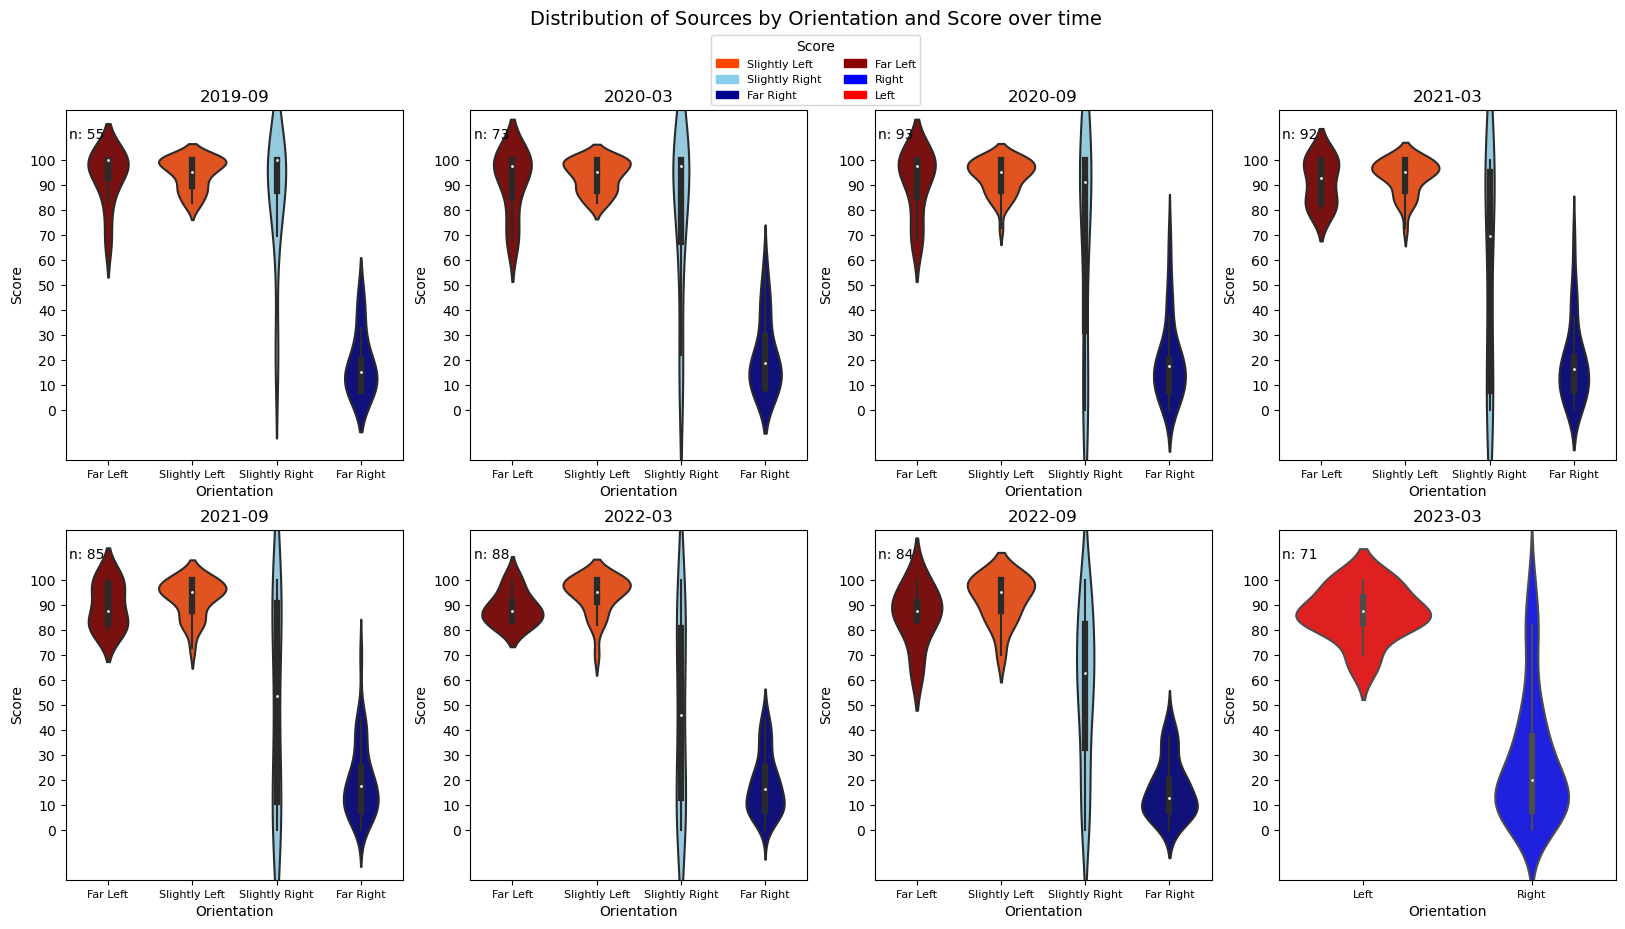

In [63]:
df_de.Orientation.replace({-1:'Far Left',-0.25:'Slightly Left',-0.5:'Left',0.5:'Right',0.25:'Slightly Right',1:'Far Right'},inplace=True)
# make orientation an ordered categorical variable
df_de.Orientation = pd.Categorical(df_de.Orientation, categories=['Far Left','Left','Slightly Left','Slightly Right','Right','Far Right'], ordered=True)

# make a tall fig with 8 subplots
fig, axs=plt.subplots(2,4,figsize=(80, 80), sharey=False)

# left red, far left dark red slightly left orange, slightly right sky blue, slightly right blue, right black
colors={"Left":"r","Far Left":"darkred","Slightly Left":"orangered","Slightly Right":"skyblue","Right":"b","Far Right":"darkblue","Undefined":"gray"}
# for each date, print the number of sources per orientation
for date in df_de.file_date.unique():
    df_date=df_de[df_de.file_date==date] 
    df_date.Orientation=df_date.Orientation.cat.add_categories("Undefined")
    df_date.Orientation.fillna("Undefined",inplace=True)
    # get ax 
    ax=axs.flatten()[list(df_de.file_date.unique()).index(date)]
    # drop undefined
    df_date=df_date[df_date.Orientation!="Undefined"]
    # remove categories with no data
    df_date.Orientation=df_date.Orientation.cat.remove_unused_categories()
    
    # plot the violin plot grouping by orientation 
    sns.violinplot(x="Orientation", y="Score", data=df_date, ax=ax, palette=colors)
    # formatted date as title
    axs.flatten()[list(df_de.file_date.unique()).index(date)].set_title(date.strftime("%Y-%m"))
    # get handles and disable legend
    axs.flatten()[list(df_de.file_date.unique()).index(date)].legend().set_visible(False)
    
    # delete all the ticks that are not between 0 and 100
    ax.set_yticks(np.arange(0, 101, 10))

    # add padding to the top of the plot
    ax.margins(y=0.001)
    ax.set_ylim(-20,120 )
    
    
    #handles, labels = axs.flatten()[list(df_de.file_date.unique()).index(date)].get_legend_handles_labels()
    
    # ticks on the x axis horizontal and smaller
    axs.flatten()[list(df_de.file_date.unique()).index(date)].tick_params(axis="x", rotation=0, labelsize=8)
    # make subplot more spaced
    axs.flatten()[list(df_de.file_date.unique()).index(date)].margins(y=0.1)
    # print on the up left of the plot the number of sources
    axs.flatten()[list(df_de.file_date.unique()).index(date)].text(0.01, 0.95, "n: "+str(len(df_date.loc[df_date.Orientation.notna(),])),verticalalignment='top', horizontalalignment='left', transform=axs.flatten()[list(df_de.file_date.unique()).index(date)].transAxes, fontsize=10)
    
    
# title
fig.suptitle("Distribution of Sources by Orientation and Score over time", fontsize=14)


# make a legend from all the colors
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in df_de.Orientation.unique().dropna()]
labels = df_de.Orientation.unique().dropna()
fig.legend(title="Score", handles=handles, labels=labels, loc='upper center', ncol=2, fontsize=8, bbox_to_anchor=(0.5, 0.96))



# more vertical space between subplots
axs.flatten()[0].margins(y=1)

fig.set_figheight(10)
fig.set_figwidth(20)
fig.savefig("violinplot_orientation.png", dpi=300, bbox_inches='tight')
plt.show()


So, in the last year they are using only this Left/Right distinction, nevertheless, the phenomenon of left wing getting better scores endures

Apparently, right wing leaning sources tend to get lower scores. I propose two possible explanations:
1. Bias by the rating agency (could be a bit but I think it's unlikely to explain this contrast)
2. As an American comedian once said, "Reality has a well known liberal bias"

Let's see how does orientation work in the latest df

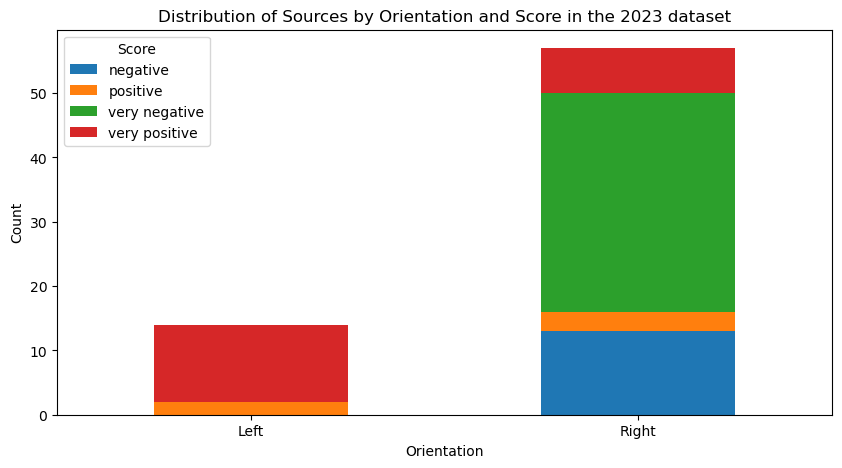

In [64]:
df_de_last["Orientation"]=df_de_last["Orientation"].replace({"Left":-1,"Right":1})
df_de_last.replace({-1:"Left",1:"Right"},inplace=True)
df_de_last['Orientation'] =pd.Categorical(df_de_last['Orientation'], categories=['Left','Right'], ordered=True)
df_de_last.groupby(['Orientation','score_cat']).size().unstack().plot(kind='bar',stacked=True,figsize=(10,5))

# put the labels on the bars
plt.xticks([0,1],['Left','Right'],rotation=0)
plt.ylabel("Count")
plt.title("Distribution of Sources by Orientation and Score in the 2023 dataset")

# set the legend title
plt.legend(title="Score")


plt.show()

More simplistic but still the same result - left wing sources tend to be more reliable

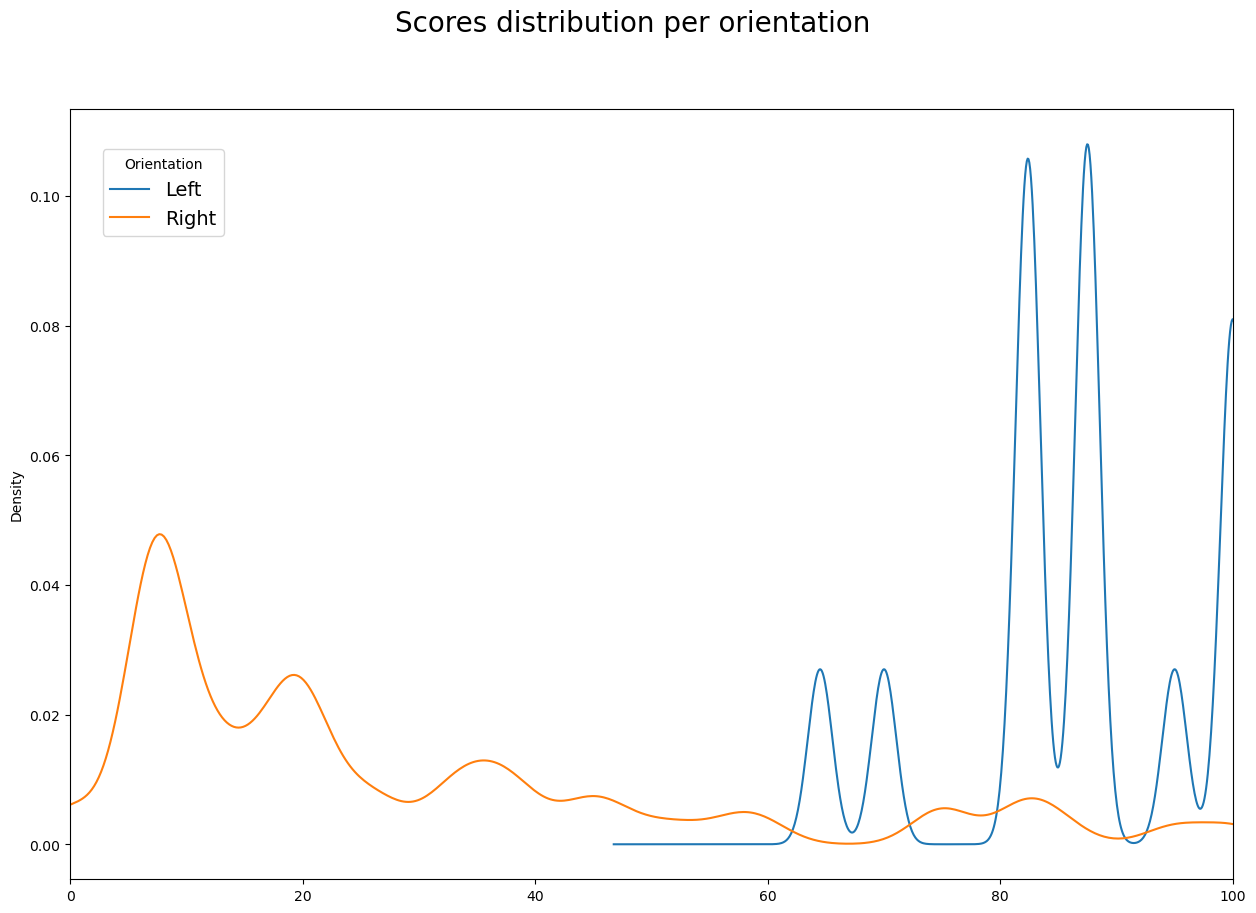

In [65]:
# kdi density plot of the score by orientation
df_de_last=df_de_last[df_de_last.Score.notna()]
fig, ax = plt.subplots(figsize=(15, 10))
fig.suptitle('Scores distribution per orientation', fontsize=20)
for orientation in ["Left","Right"]:
    # density plot that starts from 0 and ends at 100
    df_de_last[df_de_last.Orientation==orientation].Score.plot.kde(ax=ax, xlim=(0,100), label=orientation, bw_method=0.1)
    

# put a legend inside the axes on the upper left
fig.legend(loc="upper left", title="Orientation", bbox_to_anchor=(0.14, 0.85), fontsize=14)


In [66]:
df_de_last.Orientation.unique()

[NaN, 'Right', 'Left']
Categories (2, object): ['Left' < 'Right']

In [67]:
df_de_last.groupby(['Score','Orientation']).value_counts()

Series([], Name: count, dtype: int64)

# Topic - Orientation interaction

Let's see if something can be said about the distribution of sources of various orientations between topics 

In [68]:
source_df["Orientation"] = source_df["Source"].apply(lambda x: df_de_last[df_de_last["Domain"]==x]["Orientation"].values[0] if x in df_de_last["Domain"].values else None)

In [69]:
source_df.Orientation.value_counts()

Orientation
Right    57
Left     14
Name: count, dtype: int64

In [70]:
source_df.columns

Index(['Source', 'Rating', 'Score', 'Ranking', 'Topics', 'Orientation'], dtype='object')

In [71]:
# drop sources without scores 
source_df.dropna(subset=["Score"],inplace=True)

We don't many sources or political leaning nuance in this latest dataset, but we can still see how they relate to topics

In [72]:
17*2*5

170

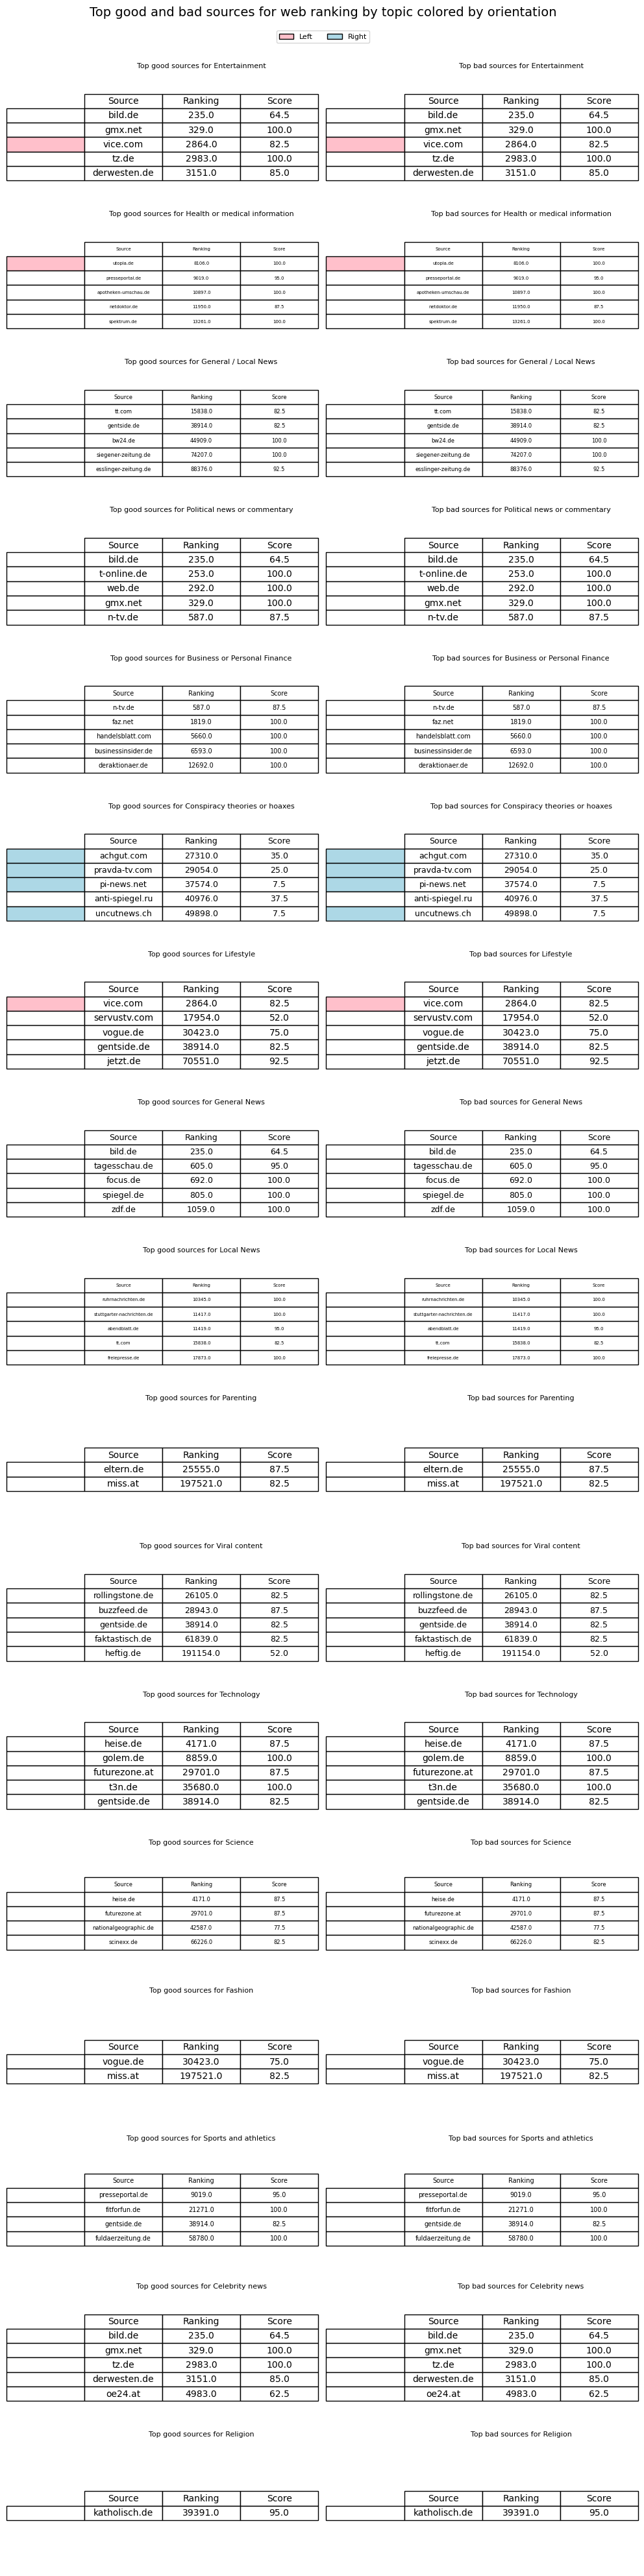

In [73]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.gridspec as gridspec
#import patch
from matplotlib.patches import Patch

# make a faced table plot of top goood and bad sources by similar_ranking by topic colored by orientation
fig = plt.figure(figsize=(10, 80))
gs = gridspec.GridSpec(nrows=35, ncols=2, figure=fig)
newi=0
for ie, topic in enumerate(topics):
    # df of rows where topic is in the list of topics
    df_topic = source_df[source_df["Topics"].apply(lambda x: topic in x)]
    
    # make a table of top 5 good and bad sources by similar_ranking
    df_topic_good = df_topic.sort_values(by="Ranking",ascending=True).head(5)
    df_topic_good.Orientation=df_topic_good.Orientation.apply(str)
    
    # plot a table, color by orientation
    colors = [(255/255, 255/255, 255/255, 1) for i in range(len(df_topic_good))]
    for i in range(len(df_topic_good)):
        if df_topic_good.iloc[i]['Orientation'] == 'Left':
            colors[i] = (255/255, 192/255, 203/255, 1)
        elif df_topic_good.iloc[i]['Orientation'] == 'Right':
            colors[i] = (173/255, 216/255, 230/255, 1)
    
    ax1 = fig.add_subplot(gs[newi])
    ax1.table(cellText=df_topic_good[["Source","Ranking","Score"]].values, colLabels=["Source","Ranking","Score"], loc='center',cellLoc='center',rowColours=colors)
    ax1.axis('off')
    ax1.set_title(f"Top good sources for {topic}",fontsize=8)
    
    df_topic_bad = df_topic.sort_values(by="Ranking",ascending=True).head(5)
    df_topic_bad.Orientation=df_topic_bad.Orientation.apply(str)
    
    colors = [(255/255, 255/255, 255/255, 1) for i in range(len(df_topic_bad))]
    for i in range(len(df_topic_bad)):
        if df_topic_bad.iloc[i]['Orientation'] == 'Left':
            colors[i] = (255/255, 192/255, 203/255, 1)
        elif df_topic_bad.iloc[i]['Orientation'] == 'Right':
            colors[i] = (173/255, 216/255, 230/255, 1)
    
    ax2 = fig.add_subplot(gs[newi+1])
    ax2.table(cellText=df_topic_bad[["Source","Ranking","Score"]].values, colLabels=["Source","Ranking","Score"], loc='center',cellLoc='center',rowColours=colors)
    ax2.axis('off')
    ax2.set_title(f"Top bad sources for {topic}",fontsize=8)
    newi=newi+2
    ax1.margins(y=0.1,x=0.1)
    ax2.margins(y=0.1,x=0.1)
    
    # squeeze the table to not fill all the subplot space
    ax1.set_xmargin(1.1)

fig.tight_layout()
# set title
fig.suptitle("Top good and bad sources for web ranking by topic colored by orientation", fontsize=14, position=(0.5,1.009))
legend_elements = [Patch(facecolor=(255/255, 192/255, 203/255, 1), edgecolor='black', label='Left'),Patch(facecolor=(173/255, 216/255, 230/255, 1), edgecolor='black', label='Right')]
fig.legend(handles=legend_elements, loc='upper center', ncol=2, fontsize=8, bbox_to_anchor=(0.5, 1.005))
plt.show()


Apparently, some of the top sources for most topics do not have an orientation score in the dataset

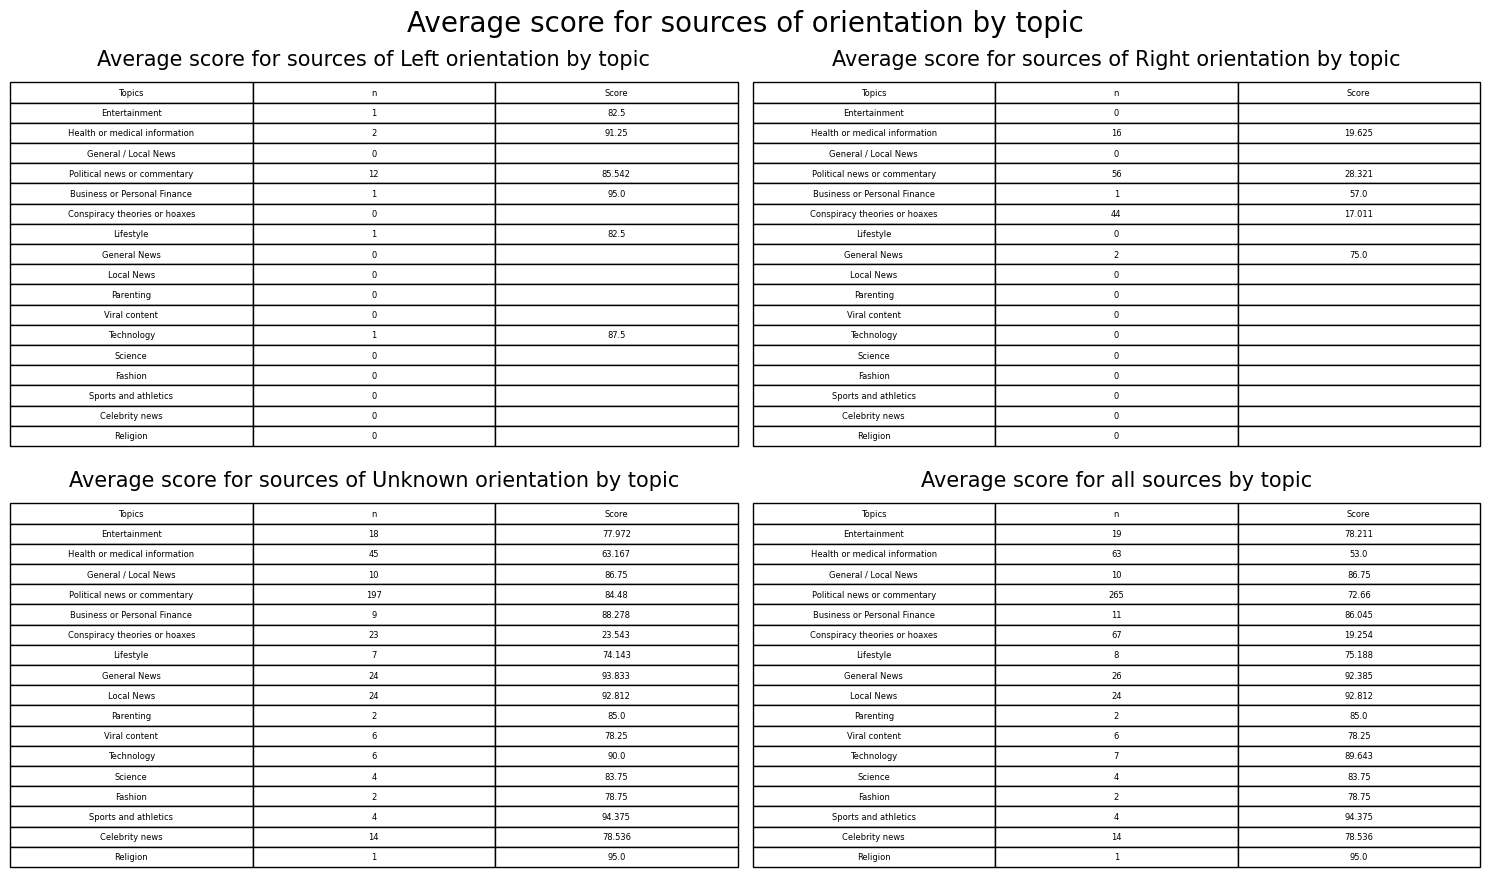

In [74]:
# table with averages of scores by orientation and topic
fig, axs = plt.subplots(2,2,figsize=(15, 9))

#substitutee nan with unknown
source_df = source_df[["Orientation","Score","Topics"]].fillna("Unknown")
for orientation in source_df.Orientation.unique():
    orientation_df = source_df[source_df["Orientation"]==orientation]
    # get ax
    ax= axs[0,0] if orientation=="Left" else axs[0,1] if orientation=="Right" else axs[1,0] if orientation=="Unknown" else axs[1,1]
    df = pd.DataFrame(columns=["Topics","n","Score"])
    for topic in topics:
        orientation_topic_df = orientation_df[orientation_df["Topics"].apply(lambda x: topic in x)]
        mean_score = orientation_topic_df["Score"].mean()
        mean_score = round(mean_score,3) if not np.isnan(mean_score) else ""
        n=len(orientation_topic_df)
        df= pd.concat([df,pd.DataFrame([[topic,n,mean_score]],columns=["Topics","n","Score"])])
    ax.table(cellText=df.values, colLabels=["Topics","n","Score"], loc='center',cellLoc='center')
    ax.title.set_text(f"Average score for sources of {orientation} orientation by topic")
    # turn off axis
    ax.axis('off')
    # reduce margins
    ax.margins(y=0.1,x=0.1)
    ax.title.set_fontsize(15)
ax= axs[1,1]
df= pd.DataFrame(columns=["Topics","n","Score"])
for topic in topics:
    topics_df = source_df[source_df["Topics"].apply(lambda x: topic in x)]
    mean_score = topics_df["Score"].mean()
    mean_score = round(mean_score,3) if not np.isnan(mean_score) else ""
    n=len(topics_df)
    df= pd.concat([df,pd.DataFrame([[topic,n,mean_score]],columns=["Topics","n","Score"])])
    
ax.title.set_text(f"Average score for all sources by topic")
# turn off axis
ax.axis('off')
# reduce margins
ax.margins(y=0.4,x=0.1)
ax.title.set_fontsize(15)
ax.table(cellText=df.values, colLabels=["Topics","n","Score"], loc='center',cellLoc='center')
fig.suptitle("Average score for sources of orientation by topic", fontsize=20)
fig.tight_layout()
    

        

## Checking other languages

In [75]:
df_total_last=df_total[df_total["file_date"]==df_total["file_date"].max()]

df_total_last

UUID                 Domain   
0     4bcfdfb8-5587-4b00-a7c4-c4d46d31bc3a                 al.com  \
1     c6f74984-caa8-4d25-b0ab-dcd42d60d077         jacobinmag.com   
2     a24182b5-9944-43bc-917f-18db87d2f129            jacobin.com   
3     4e2555e2-2abf-4635-ba5c-8c42a706fa9d       bizpacreview.com   
4     e67b8cbe-7ca6-4d0f-b12d-ba25af9b726b   americanwirenews.com   
...                                    ...                    ...   
9921  5b442eb2-eb14-4cf0-b6ff-c81679685b0f  gesundheitstrends.com   
9922  40fb1140-536a-47a0-a06c-023fbc3ddc07          flinkfeed.com   
9923  ae8b500d-683f-4e3d-a4a2-260b725ae142          flinkfeed.com   
9924  38ffb203-ebe5-4cac-8b5a-f84dd3697faf    blog.halle-leaks.de   
9925  954dfb48-6052-4e16-baaf-3f12dfb2ccce    blog.halle-leaks.de   

     Parent Domain Rating  Score   Last Updated Country Language   
0              NaN      T   95.0  1677645622005      US       en  \
1      jacobin.com      T   92.5  1677642090547      US       en   
2      jacobin.com      T   92.5  1677642090426      US       en   
3              NaN      T   62.0  1677641633936      US       en   
4              NaN      T   74.5  1677641172988      US       en   
...            ...    ...    ...            ...     ...      ...   
9921           NaN      T   82.5  1616835161457      DE       de   
9922           NaN      N   39.5  1615380820284     ALL       en   
9923           NaN      N   39.5  1615380816262      DE       de   
9924           NaN      N   37.5  1611208307207      DE       de   
9925           NaN      N   37.5  1611208302785     ALL       en   

     Does not repeatedly publish false content   
0                                          Yes  \
1                                          Yes   
2                                          Yes   
3                                          Yes   
4                                          Yes   
...                                        ...   
9921                                       Yes   
9922                                       Yes   
9923                                       Yes   
9924                                        No   
9925                                        No   

     Gathers and presents information responsibly  ... myths   
0                                             Yes  ...   NaN  \
1                                             Yes  ...   NaN   
2                                             Yes  ...   NaN   
3                                              No  ...   NaN   
4                                              No  ...   NaN   
...                                           ...  ...   ...   
9921                                          Yes  ...   NaN   
9922                                           No  ...   NaN   
9923                                           No  ...   NaN   
9924                                           No  ...   NaN   
9925                                           No  ...   NaN   

                                               iOS App   
0     https://apps.apple.com/us/app/al-com/id419876008  \
1                                                  NaN   
2                                                  NaN   
3                                                  NaN   
4                                                  NaN   
...                                                ...   
9921                                               NaN   
9922                                               NaN   
9923                                               NaN   
9924                                               NaN   
9925                                               NaN   

                                            Android App Original Reporting   
0     https://play.google.com/store/apps/details?id=...                Yes  \
1                                                   NaN                Yes   
2                                                   NaN                Yes   
3            

In [76]:
df_total_last.shape

(9926, 55)

In [77]:
for language in df_total_last.Language.unique():
    # print average score by language
    unique_sources = df_total_last[df_total_last["Language"]==language]["Domain"].unique()
    print(f"Language: {language}, Average: {df_total_last[df_total_last['Language']==language]['Score'].mean()}, Number of sources: {unique_sources.shape[0]}")

Language: en, Average: 63.592234141791046, Number of sources: 8663
Language: it, Average: 71.71670190274841, Number of sources: 481
Language: fr, Average: 66.00477326968974, Number of sources: 431
Language: de, Average: 75.1125730994152, Number of sources: 347
Language: es, Average: 82.5, Number of sources: 1


## DE, IT and EN dataset

In [78]:
# get it language, de language and en language sources
dataset=df_total[df_total_last["Language"].isin(["it","de","en"])]
dataset=dataset[dataset.Country.isin(["US","IT","DE","GB","AT"])]



C:\Users\rmlaz\AppData\Local\Temp\ipykernel_17472\1609805973.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataset=df_total[df_total_last["Language"].isin(["it","de","en"])]


In [79]:
# score over years
dataset["file_date"]=pd.to_datetime(dataset["file_date"])

In [80]:
dataset.groupby(["file_date"]).Score.mean()
dataset.groupby(["file_date"]).Score.median()


file_date
2019-03-01    87.5
2019-09-01    87.5
2020-03-01    82.5
2020-09-01    77.5
2021-03-01    80.0
2021-09-01    77.5
2022-03-01    80.0
2022-09-01    80.0
2023-03-01    72.5
Name: Score, dtype: float64

In [81]:
df_total_last[~df_total_last["Language"].isin(["it","de","en"])].Language.value_counts()

Language
fr    431
es      1
Name: count, dtype: int64

In [82]:
dataset.Language.value_counts()

Language
en    43130
it     2616
de     2027
es        2
Name: count, dtype: int64

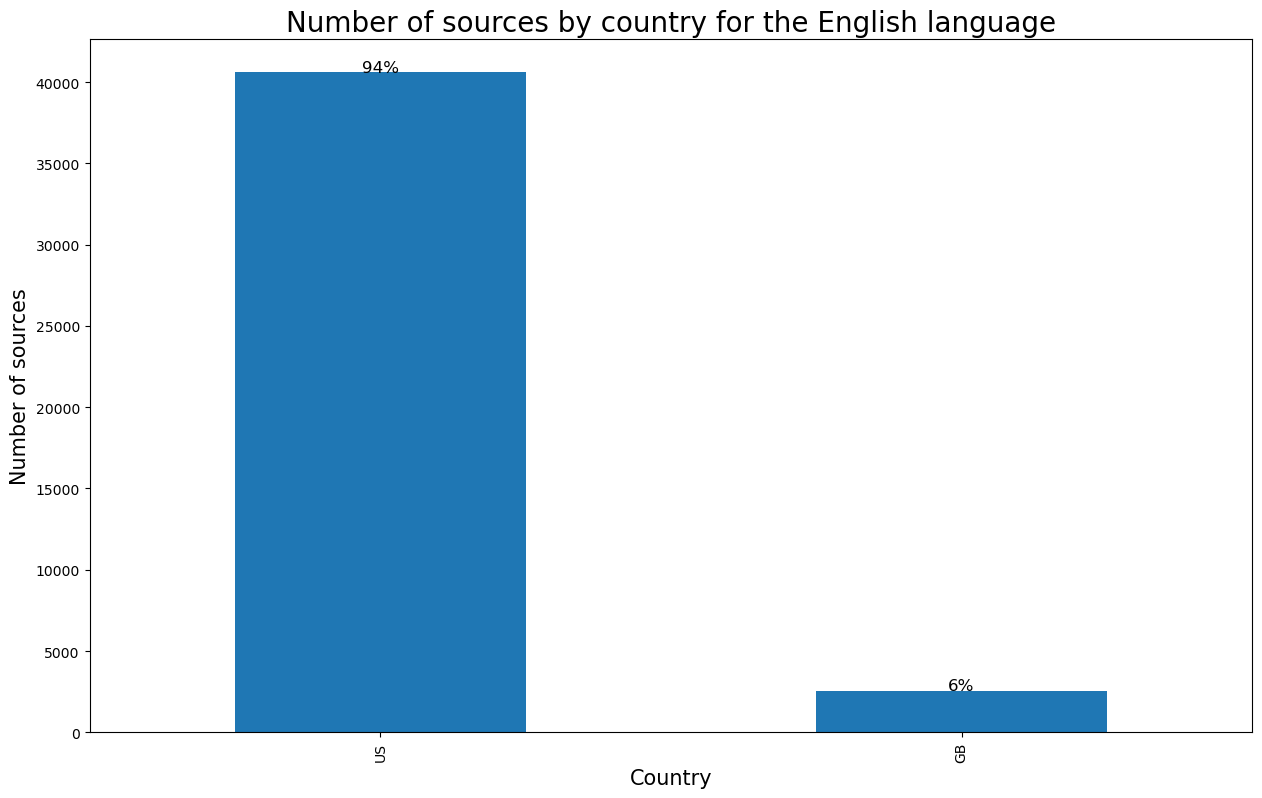

In [83]:
# plot en language sources by country

# bar plot with number of sources by country

plt.figure(figsize=(15, 9))
dataset[dataset["Language"]=="en"].Country.value_counts().plot(kind="bar")
# plot over every bar the percentage of sources

for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x()+p.get_width()/2,height+50, '{:.0f}%'.format(height/dataset[dataset["Language"]=="en"].shape[0]*100), ha="center",fontsize=12)
    


plt.title("Number of sources by country for the English language",fontsize=20)
plt.xlabel("Country",fontsize=15)
plt.ylabel("Number of sources",fontsize=15)
plt.show()

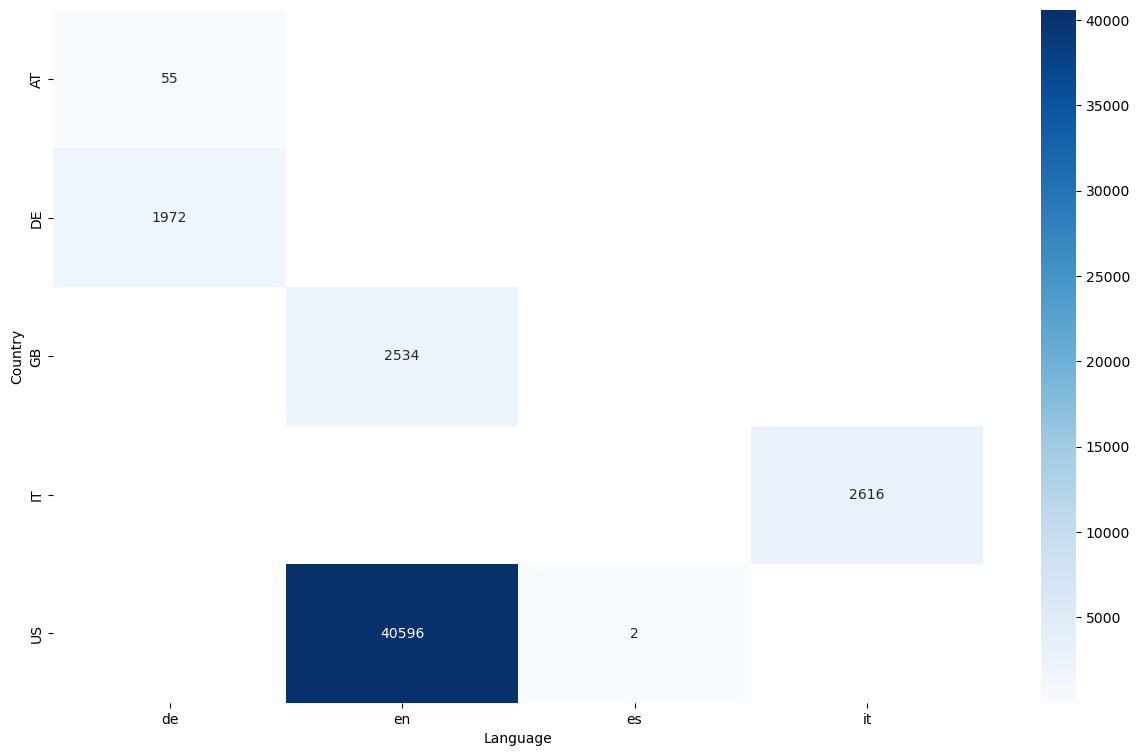

In [84]:
# heatmap with number of sources by country and language

plt.figure(figsize=(15, 9))
sns.heatmap(dataset.groupby(["Country","Language"]).size().unstack(),annot=True,fmt=".0f",cmap="Blues")
plt.show()


In [85]:
# percentage of sources with score over 60 over time rounded to 2 decimals over time
dataset.groupby(["file_date"]).Score.apply(lambda x: x.apply(lambda x: 1 if x>=60 else 0).mean()).round(3)

file_date
2019-03-01    0.714
2019-09-01    0.722
2020-03-01    0.658
2020-09-01    0.553
2021-03-01    0.576
2021-09-01    0.579
2022-03-01    0.607
2022-09-01    0.584
2023-03-01    0.577
Name: Score, dtype: float64

In [86]:

# latest ita sources
ita=dataset[dataset["Language"]=="it"]
ita=ita[ita["file_date"]==ita["file_date"].max()]

In [87]:
ita.columns

Index(['UUID', 'Domain', 'Parent Domain', 'Rating', 'Score', 'Last Updated',
       'Country', 'Language', 'Does not repeatedly publish false content',
       'Gathers and presents information responsibly',
       'Regularly corrects or clarifies errors',
       'Handles the difference between news and opinion responsibly',
       'Avoids deceptive headlines',
       'Website discloses ownership and financing',
       'Clearly labels advertising',
       'Reveals who's in charge, including any possible conflicts of interest',
       'The site provides names of content creators, along with either contact or biographical information',
       'Brand Name', 'Wikipedia', 'Type of Content', 'Medium',
       'Print Publications', 'Scope of Coverage', 'Designated Market Area',
       'Paywall', 'Opinion/Advocacy Journalism', 'Orientation', 'Owner',
       'Type of Owner', 'Facebook', 'Twitter', 'YouTube', 'Instagram',
       'Snapchat', 'LinkedIn', 'Pinterest', 'Main Point of Contact (name)',


In [88]:
# keep only Score, Orientation, Domain and criterias (the long name ones) column
ita=ita[["Score","Orientation","Domain",'Does not repeatedly publish false content',
       'Gathers and presents information responsibly',
       'Regularly corrects or clarifies errors',
       'Handles the difference between news and opinion responsibly',
       'Avoids deceptive headlines',
       'Website discloses ownership and financing',
       'Clearly labels advertising',
       "Reveals who's in charge, including any possible conflicts of interest",
       'The site provides names of content creators, along with either contact or biographical information', "Last Updated"]].sort_values(by="Score",ascending=False)


In [89]:
ita.Score.mean()

71.71670190274841

In [90]:
ita.index=ita.Domain
ita.drop(columns=["Domain"],inplace=True)

<AxesSubplot:ylabel='Frequency'>

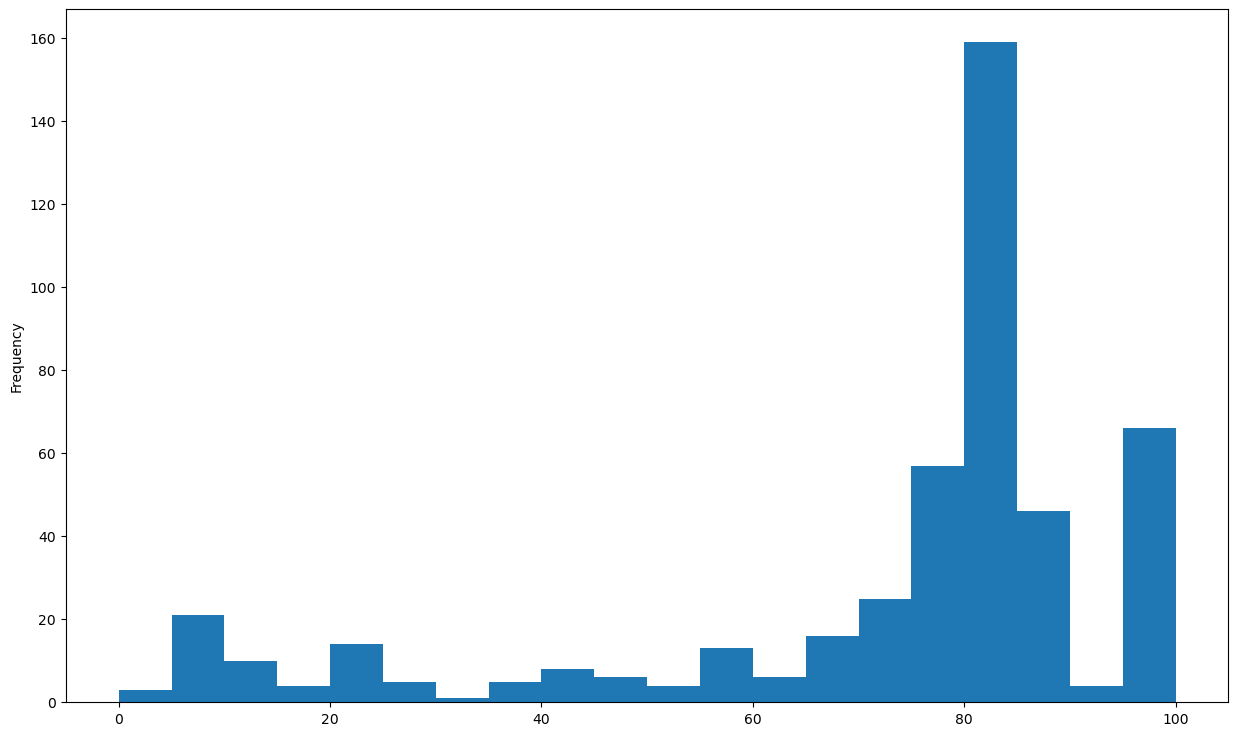

In [91]:
ita.Score.plot(kind="hist",figsize=(15, 9),bins=20)

In [92]:
ita=ita.dropna(subset=["Score"])
# last updated to datetime, unix timestamp
ita["Last Updated"]=pd.to_datetime(ita["Last Updated"],unit="ms")

In [93]:
# sort by last updated
ita=ita.sort_values(by="Last Updated",ascending=False)
ita

Score Orientation   
Domain                                   
visionetv.it          12.5         NaN  \
quicosenza.it         75.0         NaN   
askanews.it           82.5         NaN   
grottaglieinrete.it   82.5         NaN   
gay.it                75.0        Left   
...                    ...         ...   
veronasera.it         82.5         NaN   
parmatoday.it         82.5         NaN   
ilpiacenza.it         82.5         NaN   
livornotoday.it       82.5         NaN   
cisiamo.info          44.5         NaN   

                    Does not repeatedly publish false content   
Domain                                                          
visionetv.it                                               No  \
quicosenza.it                                             Yes   
askanews.it                                               Yes   
grottaglieinrete.it                                       Yes   
gay.it                                                    Yes   
...                                                       ...   
veronasera.it                                             Yes   
parmatoday.it                                             Yes   
ilpiacenza.it                                             Yes   
livornotoday.it                                           Yes   
cisiamo.info                                              Yes   

                    Gathers and presents information responsibly   
Domain                                                             
visionetv.it                                                  No  \
quicosenza.it                                                Yes   
askanews.it                                                  Yes   
grottaglieinrete.it                                          Yes   
gay.it                                                       Yes   
...                                                          ...   
veronasera.it                                                Yes   
parmatoday.it                                                Yes   
ilpiacenza.it                                                Yes   
livornotoday.it                                              Yes   
cisiamo.info                                                  No   

                    Regularly corrects or clarifies errors   
Domain                                                       
visionetv.it                                            No  \
quicosenza.it                                           No   
askanews.it                                             No   
grottaglieinrete.it                                     No   
gay.it                                                  No   
...                                                    ...   
veronasera.it                                           No   
parmatoday.it                                           No   
ilpiacenza.it                                           No   
livornotoday.it                                         No   
cisiamo.info                                            No   

                    Handles the difference between news and opinion responsibly   
Domain                                                                            
visionetv.it                                                        No           \
quicosenza.it                                                      Yes            
askanews.it                                                        Yes            
grottaglieinrete.it                                                Yes            
gay.it                                                              No            
...                                                                ...            
veronasera.it                                                      Yes            
parmatoday.it                                                      Yes            
ilpiacenza.it                                                      Yes            
livornotoday.it        

In [94]:
# find newspapers with scomodo in their domain
ita[ita.index.str.contains("leggi")]

Score Orientation Does not repeatedly publish false content   
Domain                                                                     
leggilo.org   70.0       Right                                       Yes  \

            Gathers and presents information responsibly   
Domain                                                     
leggilo.org                                          Yes  \

            Regularly corrects or clarifies errors   
Domain                                               
leggilo.org                                     No  \

            Handles the difference between news and opinion responsibly   
Domain                                                                    
leggilo.org                                                 No           \

            Avoids deceptive headlines   
Domain                                   
leggilo.org                        Yes  \

            Website discloses ownership and financing   
Domain                                                  
leggilo.org                                       Yes  \

            Clearly labels advertising   
Domain                                   
leggilo.org                        Yes  \

            Reveals who's in charge, including any possible conflicts of interest   
Domain                                                                              
leggilo.org                                                Yes                     \

            The site provides names of content creators, along with either contact or biographical information   
Domain                                                                                                           
leggilo.org                                                 No                                                  \

                       Last Updated  
Domain                               
leggilo.org 2022-07-03 14:36:31.312